<a href="https://colab.research.google.com/github/reddy-shreyas/ThesisCode/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220719082949
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: protobuf, h5py, astunparse, absl-py, typing-extensions, wrapt, flatbuffers, tensorboard, gast, tensorflow-estimator, keras-preprocessing, numpy, libclang, opt-einsum, keras, six, termcolor, google-pasta, setuptools, grpcio, tensorflow-io-gcs-filesystem
Required-by: kapre


#Importing required libraries

In [ ]:

import os
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers, models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import image
from matplotlib import pyplot
from scipy.misc import imread
from scipy.misc import imresize
import datetime
import sklearn
import imageio
import skimage.transform
import cv2
import os
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Reshape, Concatenate, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation, GlobalMaxPooling2D
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.densenet import DenseNet121

#from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import pydot
import re
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn


##Mounting Google drive

In [ ]:
## We are using the data by mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Basic EDA

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/COVID/train.txt', sep=" ", header=None)

In [ ]:
df_train.head()

,0,1,2,3
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


In [ ]:
#To help understand the columns better, we rename them

df_train.columns = ['Patient ID', 'Filename', 'Class', 'Data Source']

In [ ]:
df_train.head()

,Patient ID,Filename,Class,Data Source
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


In [ ]:
#Since we perform an image classification task we do not require the patient ID and data source columns

df_train = df_train.drop(['Patient ID', 'Data Source'], axis=1 )
df_train.head()

,Filename,Class
0,ARDSSevere.png,negative
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative
2,acute-respiratory-distress-syndrome-ards.jpg,negative
3,ards-secondary-to-tiger-snake-bite.png,negative
4,pneumocystis-pneumonia-2-PA.png,negative


In [ ]:
#Doing all the above steps on the test set

df_test = pd.read_csv('/content/drive/MyDrive/COVID/test.txt', sep=" ", header=None)

df_test.columns = ['Patient ID', 'Filename', 'Class', 'Data Source']
df_test= df_test.drop(['Patient ID', 'Data Source'], axis=1 )
df_test.head()

,Filename,Class
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive


In [ ]:
train_path = '/content/drive/MyDrive/COVID/train'  #path directory for training
test_path = '/content/drive/MyDrive/COVID/test'   #path directory for test

In [ ]:
df_train['Class'].value_counts()

positive    15994
negative    13992
Name: Class, dtype: int64

In [ ]:
df_train['Class'].value_counts(normalize=True) * 100

positive    53.338225
negative    46.661775
Name: Class, dtype: float64

In [ ]:
df_test['Class'].value_counts()

positive    200
negative    200
Name: Class, dtype: int64

###Displaying an image of a Positive and Negative chest x-ray

In [ ]:
# Loading job using matplotlib
from matplotlib import image
from matplotlib import pyplot
pos = image.imread('/content/drive/MyDrive/COVID/train/A769617-12-31-1900-NA-CHEST_AP_VIEWONLY-31831-1.000000-AP-24877-1-1.jpg')
neg = image.imread('/content/drive/MyDrive/COVID/train/27ee75df-d2e3-40c0-994f-3efd14e6dafb.png')

In [ ]:
print(pos.dtype)
print(pos.shape)
print()
print(neg.dtype)
print(neg.shape)
print()

uint8
(512, 512)

float32
(1024, 1024)



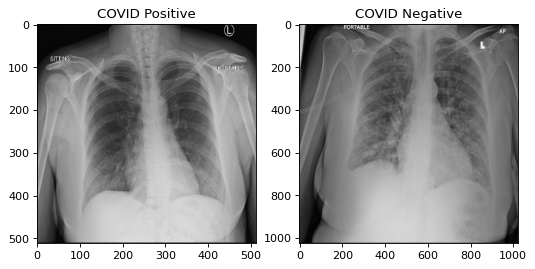

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
# plotting the images using matplotlib
pyplot.subplot(131)
pyplot.imshow(pos,cmap='gray')
plt.title("COVID Positive")
pyplot.subplot(132)
pyplot.imshow(neg,cmap='gray')
plt.title("COVID Negative")

pyplot.show()

##Data Augmentation

In [ ]:
#Using 40% of the dataset as the dataset is huge and the resources available make it difficult to process the entire dataset limiting the training model
epochs=20
negative  = df_train[df_train['Class']=='negative']   #negative values in class column
positive = df_train[df_train['Class']=='positive']  #positive values in class column

from sklearn.utils import resample

#n_samples = 6400 will help us use 40% of the dataset and resample will reduce the size of the dataset i.e. downsample the dataset
#creating two datasets of 6400 images each, with positive images in df_pos_ds and negative images in df_neg_ds

df_neg_ds = resample(negative, replace = True, n_samples = 6400) 
df_pos_ds= resample(positive, replace=True, n_samples=6400)

#concatenate

df_train = pd.concat([df_pos_ds, df_neg_ds])


In [ ]:
from sklearn.utils import shuffle
df_train = shuffle(df_train) # shuffling so that there is particular sequence

In [ ]:
# summarize shape of the new downsampled dataset

print(df_train.shape)
print()

print(df_test.shape)

(12800, 2)

(400, 2)


In [ ]:
df_train, df_valid = train_test_split(df_train, train_size=0.9, random_state=0)

In [ ]:
#Let's see how many images for training and validation and testing

print(f"Positive & negative values of train: \n{df_train['Class'].value_counts()}")
print()
print(f"Positive & negative values of validation: \n{df_valid['Class'].value_counts()}")
print()
print(f"Positive & negative values of test: \n{df_test['Class'].value_counts()}")

Positive & negative values of train: 
positive    5769
negative    5751
Name: Class, dtype: int64

Positive & negative values of validation: 
negative    649
positive    631
Name: Class, dtype: int64

Positive & negative values of test: 
positive    200
negative    200
Name: Class, dtype: int64


In [ ]:

#Using ImageDataGenerator for keras as it lets us augment images in real-time as they are training

#We don't augment test dataset as it introduces a bias, we only do this for the train dataset as it improves the learning process of the model 

train_dg = ImageDataGenerator (rescale = 1./255.,rotation_range = 40, width_shift_range = 0.25, shear_range = 0.25, height_shift_range = 0.25, 
                                   zoom_range = 0.25, horizontal_flip = True, vertical_flip =True)
test_dg = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
#Now fitting them by getting the images from directory and applying augmentation


train_gen = train_dg.flow_from_dataframe(dataframe = df_train, directory=train_path, x_col='Filename', 
                                         y_col='Class', target_size=(224,224), batch_size=64, class_mode='binary')

valid_gen = test_dg.flow_from_dataframe(dataframe = df_valid, directory=train_path, x_col='Filename',
                                        y_col='Class', target_size=(224,224), batch_size=64, class_mode='binary')

test_gen = test_dg.flow_from_dataframe(dataframe = df_test, directory=test_path, x_col='Filename', 
                                       y_col='Class', target_size=(224,224), batch_size=64, class_mode='binary')

#Binary class mode is chosen as we require the model to predict if the x-ray is COVID positive or COVID negative, i.e. only two outcomes are possible

#target size (224,224) as the images are resized to 224*224 pixels

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 11519 validated image filenames belonging to 2 classes.
Found 1280 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


##Dataset Modelling

###ResNet50

 

In [ ]:

base_model_RN50 = ResNet50(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_RN50.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 0s 0us/step


####Model 1


In [ ]:
#Model 4 128, 0.2, 0.001, ReLU, Adam
model_RN50 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
##second dense layer was commented, first layer changed from 128
history_RN50 = model_RN50.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 395s 2s/step - loss: 0.4706 - accuracy: 0.7772 - precision: 0.8171 - recall: 0.7115 - auc: 0.8547 - true_positives: 4079.0000 - true_negatives: 4873.0000 - false_positives: 913.0000 - false_negatives: 1654.0000 - val_loss: 1.9361 - val_accuracy: 0.4797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8477 - val_true_positives: 0.0000e+00 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 666.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 304s 2s/step - loss: 0.4356 - accuracy: 0.8013 - precision: 0.8294 - recall: 0.7563 - auc: 0.8778 - true_positives: 4336.0000 - true_negatives: 4894.0000 - false_positives: 892.0000 - false_negatives: 1397.0000 - val_loss: 0.6240 - val_accuracy: 0.5320 - val_precision: 0.5266 - val_recall: 0.9970 - val_auc: 0.9030 - val_true_positives: 664.0000 - val_true_negatives: 17.0000 - val_false_positives: 597.0000 - val_false_nega

In [ ]:
# load the saved model
saved_model_RN50 = tf.keras.models.load_model('covid_classifier_model_RN50.h5')
saved_model_RN50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.543276309967041 , Validation Accuracy:  0.532031238079071


In [ ]:
# evaluate the model on train set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.6081432104110718 
 Accuracy: 0.5417137145996094 
 Precision: 0.5207913517951965 
 Recall: 0.9918018579483032 
 AUC: 0.8917026519775391 
 True Positive: 5686.0 
 True Negative: 554.0 
 False Positive: 5232.0 
 False Negative: 47.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.6240397095680237 
 Accuracy: 0.532031238079071 
 Precision: 0.526566207408905 
 Recall: 0.9969969987869263 
 AUC: 0.902975857257843 
 True Positive: 664.0 
 True Negative: 17.0 
 False Positive: 597.0 
 False Negative: 2.0


In [ ]:
history_dict = history_RN50.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


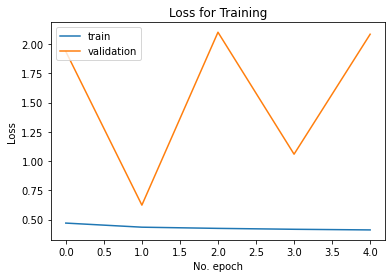

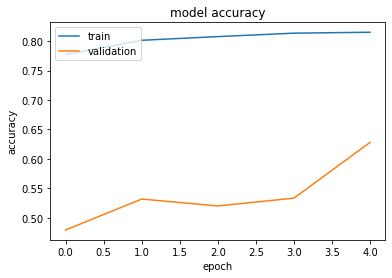

In [ ]:
plt.plot(history_RN50.history['loss'], label='Loss (training data)')
plt.plot(history_RN50.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50.history['accuracy'])
plt.plot(history_RN50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predictions on Test set 

saved_model_RN50.load_weights('./covid_classifier_model_RN50.h5')
record_RN50 = saved_model_RN50.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.6941 - accuracy: 0.5100 - precision: 0.5051 - recall: 1.0000 - auc: 0.8583 - true_positives: 200.0000 - true_negatives: 4.0000 - false_positives: 196.0000 - false_negatives: 0.0000e+00


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(200.0, 4.0, 196.0, 0.0)

In [ ]:
predict_RN50 = saved_model_RN50.predict(test_gen)
#predict

In [ ]:


y_pred_RN50 = predict_RN50 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50 = confusion_matrix(test_gen.classes, y_pred_RN50)
print(mat_RN50)

Confusion Matrix
[[165  35]
 [166  34]]


In [ ]:
conf_RN50 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50

[[4.0, 196.0], [0.0, 200.0]]

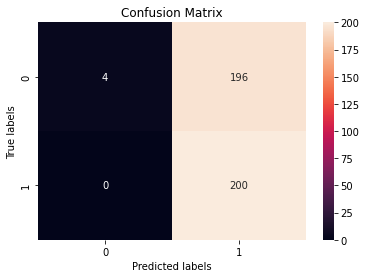

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

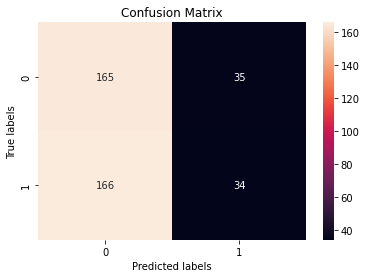

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RN50.load_weights("covid_classifier_model_RN50.h5")
model_RN50.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.6941 - accuracy: 0.5100 - precision: 0.5051 - recall: 1.0000 - auc: 0.8583 - true_positives: 200.0000 - true_negatives: 4.0000 - false_positives: 196.0000 - false_negatives: 0.0000e+00


[0.6940822005271912,
 0.5099999904632568,
 0.5050504803657532,
 1.0,
 0.8583375215530396,
 200.0,
 4.0,
 196.0,
 0.0]

####Model 2

In [ ]:
#Model 4 256, 0.2, 0.001, ReLU, Adam
model_RN50_1 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_1.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
##second dense layer was commented, first layer changed from 128
history_RN50_1 = model_RN50_1.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 313s 2s/step - loss: 0.4701 - accuracy: 0.7761 - precision: 0.8117 - recall: 0.7164 - auc: 0.8546 - true_positives: 4107.0000 - true_negatives: 4833.0000 - false_positives: 953.0000 - false_negatives: 1626.0000 - val_loss: 1.0970 - val_accuracy: 0.4797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8972 - val_true_positives: 0.0000e+00 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 666.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 297s 2s/step - loss: 0.4361 - accuracy: 0.7983 - precision: 0.8258 - recall: 0.7539 - auc: 0.8771 - true_positives: 4322.0000 - true_negatives: 4874.0000 - false_positives: 912.0000 - false_negatives: 1411.0000 - val_loss: 1.2528 - val_accuracy: 0.5031 - val_precision: 1.0000 - val_recall: 0.0450 - val_auc: 0.9072 - val_true_positives: 30.0000 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_ne

In [ ]:
# load the saved model
saved_model_RN50_1 = tf.keras.models.load_model('covid_classifier_model_RN50_1.h5')
saved_model_RN50_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy 
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50_1.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50_1.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.7241948246955872 , Validation Accuracy:  0.8023437261581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50_1.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.49345701932907104 
 Accuracy: 0.7221981287002563 
 Precision: 0.9675157070159912 
 Recall: 0.4571777284145355 
 AUC: 0.8980010747909546 
 True Positive: 2621.0 
 True Negative: 5698.0 
 False Positive: 88.0 
 False Negative: 3112.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50_1.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.4157683253288269 
 Accuracy: 0.8023437261581421 
 Precision: 0.9154929518699646 
 Recall: 0.6831831932067871 
 AUC: 0.8998652696609497 
 True Positive: 455.0 
 True Negative: 572.0 
 False Positive: 42.0 
 False Negative: 211.0


In [ ]:
history_dict = history_RN50_1.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


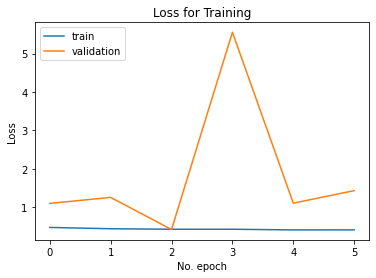

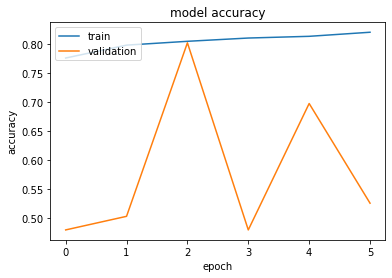

In [ ]:
plt.plot(history_RN50_1.history['loss'], label='Loss (training data)')
plt.plot(history_RN50_1.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50_1.history['accuracy'])
plt.plot(history_RN50_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predictions on Test set

saved_model_RN50_1.load_weights('./covid_classifier_model_RN50_1.h5')
record_RN50_1 = saved_model_RN50_1.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.5272 - accuracy: 0.7475 - precision: 0.9024 - recall: 0.5550 - auc: 0.8702 - true_positives: 111.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 89.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50_1[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(111.0, 188.0, 12.0, 89.0)

In [ ]:
predict_RN50_1 = saved_model_RN50_1.predict(test_gen)
#predict

In [ ]:
y_pred_RN50_1 = predict_RN50_1 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50_1 = confusion_matrix(test_gen.classes, y_pred_RN50_1)
print(mat_RN50_1)

Confusion Matrix
[[197   3]
 [195   5]]


In [ ]:
conf_RN50_1 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50_1

[[188.0, 12.0], [89.0, 111.0]]

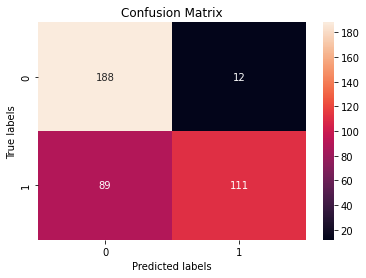

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50_1, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

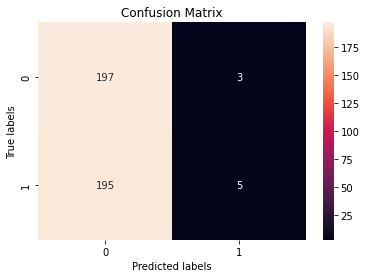

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50_1, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RN50_1.load_weights("covid_classifier_model_RN50_1.h5")
model_RN50_1.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.5272 - accuracy: 0.7475 - precision: 0.9024 - recall: 0.5550 - auc: 0.8702 - true_positives: 111.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 89.0000


[0.5271748900413513,
 0.7475000023841858,
 0.9024389982223511,
 0.5550000071525574,
 0.8702374696731567,
 111.0,
 188.0,
 12.0,
 89.0]

####Model 3 Best Results

In [ ]:
#Model 3 256, 0.1, 0.001, ReLU, Adam
model_RN50_2 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
##second dense layer was commented, first layer changed from 128
history_RN50_2 = model_RN50_2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 314s 2s/step - loss: 0.4695 - accuracy: 0.7844 - precision: 0.8223 - recall: 0.7230 - auc: 0.8579 - true_positives: 4145.0000 - true_negatives: 4890.0000 - false_positives: 896.0000 - false_negatives: 1588.0000 - val_loss: 1.0125 - val_accuracy: 0.4797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9141 - val_true_positives: 0.0000e+00 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 666.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 301s 2s/step - loss: 0.4292 - accuracy: 0.8051 - precision: 0.8326 - recall: 0.7616 - auc: 0.8807 - true_positives: 4366.0000 - true_negatives: 4908.0000 - false_positives: 878.0000 - false_negatives: 1367.0000 - val_loss: 0.7337 - val_accuracy: 0.6461 - val_precision: 1.0000 - val_recall: 0.3198 - val_auc: 0.9061 - val_true_positives: 213.0000 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_n

In [ ]:
# load the saved model
saved_model_RN50_2 = tf.keras.models.load_model('covid_classifier_model_RN50_2.h5')
saved_model_RN50_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50_2.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50_2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.7407761216163635 , Validation Accuracy:  0.633593738079071


In [ ]:
# evaluate the model on train set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50_2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.47348034381866455 
 Accuracy: 0.7439882159233093 
 Precision: 0.6754032373428345 
 Recall: 0.9349380731582642 
 AUC: 0.9046211242675781 
 True Positive: 5360.0 
 True Negative: 3210.0 
 False Positive: 2576.0 
 False Negative: 373.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50_2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.6540132761001587 
 Accuracy: 0.633593738079071 
 Precision: 0.5888187289237976 
 Recall: 0.9804804921150208 
 AUC: 0.9134374856948853 
 True Positive: 653.0 
 True Negative: 158.0 
 False Positive: 456.0 
 False Negative: 13.0


In [ ]:
history_dict = history_RN50_2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


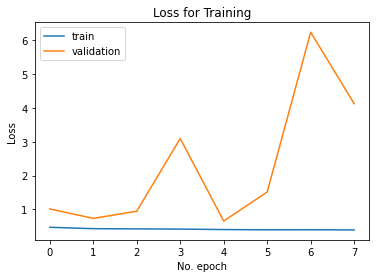

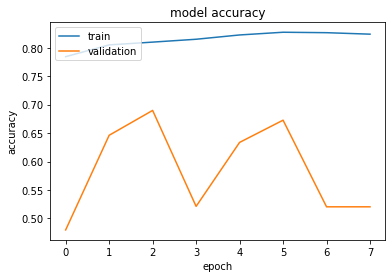

In [ ]:
plt.plot(history_RN50_2.history['loss'], label='Loss (training data)')
plt.plot(history_RN50_2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50_2.history['accuracy'])
plt.plot(history_RN50_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predictions on Test set

saved_model_RN50_2.load_weights('./covid_classifier_model_RN50_2.h5')
record_RN50_2 = saved_model_RN50_2.evaluate(test_gen)

7/7 [==============================] - 35s 5s/step - loss: 0.7255 - accuracy: 0.6300 - precision: 0.5756 - recall: 0.9900 - auc: 0.8629 - true_positives: 198.0000 - true_negatives: 54.0000 - false_positives: 146.0000 - false_negatives: 2.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50_2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(198.0, 54.0, 146.0, 2.0)

In [ ]:
predict_RN50_2 = saved_model_RN50_2.predict(test_gen)
#predict

In [ ]:


y_pred_RN50_2 = predict_RN50_2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50_2 = confusion_matrix(test_gen.classes, y_pred_RN50_2)
print(mat_RN50_2)

Confusion Matrix
[[ 77 123]
 [ 83 117]]


In [ ]:
conf_RN50_2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50_2

[[54.0, 146.0], [2.0, 198.0]]

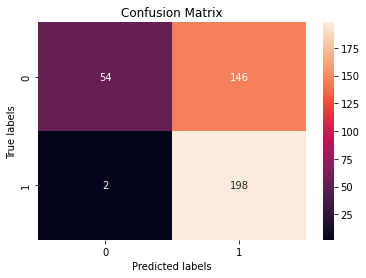

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50_2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

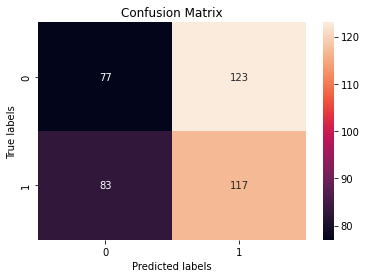

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50_2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RN50_2.load_weights("covid_classifier_model_RN50_2.h5")
model_RN50_2.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.7255 - accuracy: 0.6300 - precision: 0.5756 - recall: 0.9900 - auc: 0.8629 - true_positives: 198.0000 - true_negatives: 54.0000 - false_positives: 146.0000 - false_negatives: 2.0000


[0.7255464792251587,
 0.6299999952316284,
 0.5755813717842102,
 0.9900000095367432,
 0.8629499673843384,
 198.0,
 54.0,
 146.0,
 2.0]

####Model 4

In [ ]:
#Model 4 256, 0.3, 0.001, ReLU, Adam
model_RN50_3 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),  
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
##second dense layer was commented, first layer changed from 128
history_RN50_3 = model_RN50_3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 318s 2s/step - loss: 0.4736 - accuracy: 0.7732 - precision: 0.8022 - recall: 0.7225 - auc: 0.8531 - true_positives: 4142.0000 - true_negatives: 4765.0000 - false_positives: 1021.0000 - false_negatives: 1591.0000 - val_loss: 0.8791 - val_accuracy: 0.4812 - val_precision: 1.0000 - val_recall: 0.0030 - val_auc: 0.9082 - val_true_positives: 2.0000 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 664.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 302s 2s/step - loss: 0.4339 - accuracy: 0.7984 - precision: 0.8288 - recall: 0.7499 - auc: 0.8777 - true_positives: 4299.0000 - true_negatives: 4898.0000 - false_positives: 888.0000 - false_negatives: 1434.0000 - val_loss: 1.3080 - val_accuracy: 0.5203 - val_precision: 0.5203 - val_recall: 1.0000 - val_auc: 0.9045 - val_true_positives: 666.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 614.0000 - val_false_negatives: 0

In [ ]:
# load the saved model
saved_model_RN50_3 = tf.keras.models.load_model('covid_classifier_model_RN50_3.h5')
saved_model_RN50_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_17 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50_3.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50_3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.7653442025184631 , Validation Accuracy:  0.840624988079071


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50_3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.46765169501304626 
 Accuracy: 0.7662991285324097 
 Precision: 0.9611768126487732 
 Recall: 0.5527647137641907 
 AUC: 0.9050986170768738 
 True Positive: 3169.0 
 True Negative: 5658.0 
 False Positive: 128.0 
 False Negative: 2564.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50_3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.36261987686157227 
 Accuracy: 0.840624988079071 
 Precision: 0.8982758522033691 
 Recall: 0.782282292842865 
 AUC: 0.917730450630188 
 True Positive: 521.0 
 True Negative: 555.0 
 False Positive: 59.0 
 False Negative: 145.0


In [ ]:
history_dict = history_RN50_3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


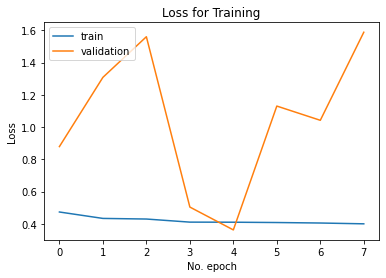

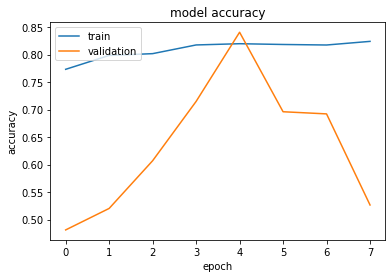

In [ ]:
plt.plot(history_RN50_3.history['loss'], label='Loss (training data)')
plt.plot(history_RN50_3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50_3.history['accuracy'])
plt.plot(history_RN50_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()

In [ ]:
#Prediction on the test set
saved_model_RN50_3.load_weights('./covid_classifier_model_RN50_3.h5')
record_RN50_3 = saved_model_RN50_3.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.5112 - accuracy: 0.7575 - precision: 0.8552 - recall: 0.6200 - auc: 0.8456 - true_positives: 124.0000 - true_negatives: 179.0000 - false_positives: 21.0000 - false_negatives: 76.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50_3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(124.0, 179.0, 21.0, 76.0)

In [ ]:
predict_RN50_3 = saved_model_RN50_3.predict(test_gen)
#predict

In [ ]:
y_pred_RN50_3 = predict_RN50_3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50_3 = confusion_matrix(test_gen.classes, y_pred_RN50_3)
print(mat_RN50_3)

Confusion Matrix
[[175  25]
 [173  27]]


In [ ]:
conf_RN50_3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50_3

[[179.0, 21.0], [76.0, 124.0]]

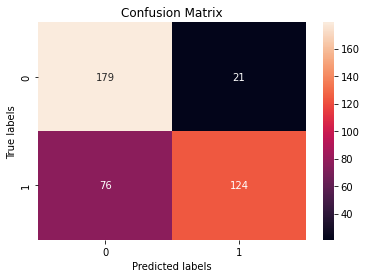

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50_3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

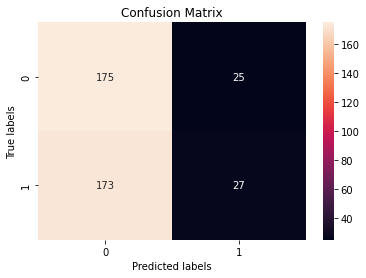

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50_3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

####Model 5

In [ ]:
#Model 5 512, 0.2, 0.001, ReLU, Adam
model_RN50_5 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_5.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_5.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:

history_RN50_5 = model_RN50_5.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 380s 2s/step - loss: 0.4681 - accuracy: 0.7824 - precision: 0.8119 - recall: 0.7326 - auc: 0.8607 - true_positives: 4200.0000 - true_negatives: 4813.0000 - false_positives: 973.0000 - false_negatives: 1533.0000 - val_loss: 1.7279 - val_accuracy: 0.4797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8888 - val_true_positives: 0.0000e+00 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 666.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 306s 2s/step - loss: 0.4345 - accuracy: 0.8041 - precision: 0.8271 - recall: 0.7668 - auc: 0.8797 - true_positives: 4396.0000 - true_negatives: 4867.0000 - false_positives: 919.0000 - false_negatives: 1337.0000 - val_loss: 2.8783 - val_accuracy: 0.4797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7027 - val_true_positives: 0.0000e+00 - val_true_negatives: 614.0000 - val_false_positives: 0.0000e+00 - v

In [ ]:
# load the saved model
saved_model_RN50_5 = tf.keras.models.load_model('covid_classifier_model_RN50_5.h5')
saved_model_RN50_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_19 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy 
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50_5.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50_5.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.7403420209884644 , Validation Accuracy:  0.8335937261581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50_5.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.5340104699134827 
 Accuracy: 0.7417310476303101 
 Precision: 0.9712918400764465 
 Recall: 0.49572649598121643 
 AUC: 0.9064427614212036 
 True Positive: 2842.0 
 True Negative: 5702.0 
 False Positive: 84.0 
 False Negative: 2891.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50_5.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.37727034091949463 
 Accuracy: 0.8335937261581421 
 Precision: 0.9249531030654907 
 Recall: 0.740240216255188 
 AUC: 0.9168354272842407 
 True Positive: 493.0 
 True Negative: 574.0 
 False Positive: 40.0 
 False Negative: 173.0


In [ ]:
history_dict = history_RN50_5.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


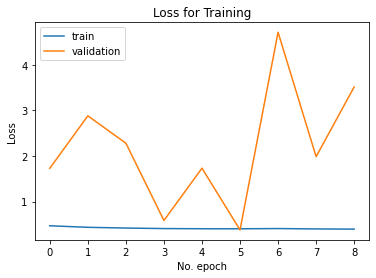

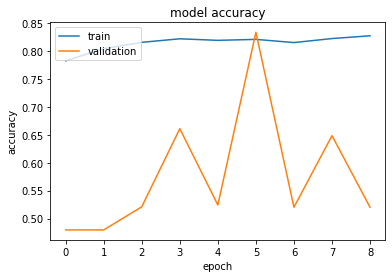

In [ ]:
plt.plot(history_RN50_5.history['loss'], label='Loss (training data)')
plt.plot(history_RN50_5.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50_5.history['accuracy'])
plt.plot(history_RN50_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predictions on Test set
saved_model_RN50_5.load_weights('./covid_classifier_model_RN50_5.h5')
record_RN50_5 = saved_model_RN50_5.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.5723 - accuracy: 0.7300 - precision: 0.8651 - recall: 0.5450 - auc: 0.8296 - true_positives: 109.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 91.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50_5[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(109.0, 183.0, 17.0, 91.0)

In [ ]:
predict_RN50_5 = saved_model_RN50_5.predict(test_gen)
#predict

In [ ]:
y_pred_RN50_5 = predict_RN50_5 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50_5 = confusion_matrix(test_gen.classes, y_pred_RN50_5)
print(mat_RN50_5)

Confusion Matrix
[[176  24]
 [179  21]]


In [ ]:
conf_RN50_5 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50_5

[[183.0, 17.0], [91.0, 109.0]]

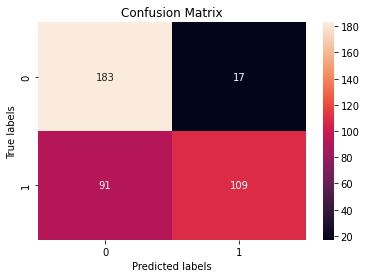

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50_5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

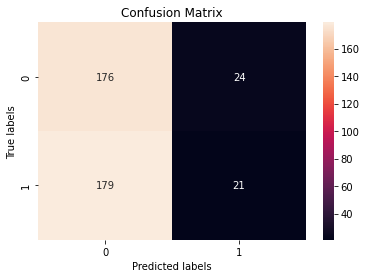

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50_5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RN50_5.load_weights("covid_classifier_model_RN50_5.h5")
model_RN50_5.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.5723 - accuracy: 0.7300 - precision: 0.8651 - recall: 0.5450 - auc: 0.8296 - true_positives: 109.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 91.0000


[0.5723012089729309,
 0.7300000190734863,
 0.8650793433189392,
 0.5450000166893005,
 0.8295875191688538,
 109.0,
 183.0,
 17.0,
 91.0]

####Model 6

(Ignored as results were terrible)


In [ ]:

model_RN50_6 = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512, activation='ReLU'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_6.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_6.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
##second dense layer was commented, first layer changed from 128
history_RN50_6 = model_RN50_6.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 333s 2s/step - loss: 0.4829 - accuracy: 0.7640 - precision: 0.7906 - recall: 0.7169 - auc: 0.8482 - true_positives: 4120.0000 - true_negatives: 4681.0000 - false_positives: 1091.0000 - false_negatives: 1627.0000 - val_loss: 0.8737 - val_accuracy: 0.4914 - val_precision: 1.0000 - val_recall: 0.0015 - val_auc: 0.8974 - val_true_positives: 1.0000 - val_true_negatives: 628.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 651.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 294s 2s/step - loss: 0.4323 - accuracy: 0.8057 - precision: 0.8348 - recall: 0.7613 - auc: 0.8817 - true_positives: 4375.0000 - true_negatives: 4906.0000 - false_positives: 866.0000 - false_negatives: 1372.0000 - val_loss: 1.5537 - val_accuracy: 0.4922 - val_precision: 1.0000 - val_recall: 0.0031 - val_auc: 0.9097 - val_true_positives: 2.0000 - val_true_negatives: 628.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 650

In [ ]:
# load the saved model
saved_model_RN50_6 = tf.keras.models.load_model('covid_classifier_model_RN50_6.h5')
saved_model_RN50_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_RN50_6.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RN50_6.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.5010851621627808 , Validation Accuracy:  0.49140626192092896


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RN50_6.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.9443925023078918 
 Accuracy: 0.5010851621627808 
 Precision: 0.0 
 Recall: 0.0 
 AUC: 0.8856375813484192 
 True Positive: 0.0 
 True Negative: 5772.0 
 False Positive: 0.0 
 False Negative: 5747.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RN50_6.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.8737119436264038 
 Accuracy: 0.49140626192092896 
 Precision: 1.0 
 Recall: 0.0015337422955781221 
 AUC: 0.8973735570907593 
 True Positive: 1.0 
 True Negative: 628.0 
 False Positive: 0.0 
 False Negative: 651.0


In [ ]:
history_dict = history_RN50_6.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


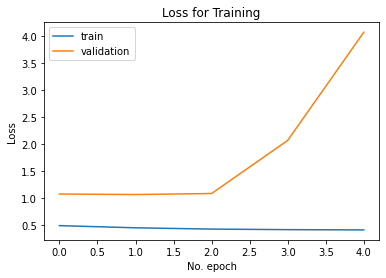

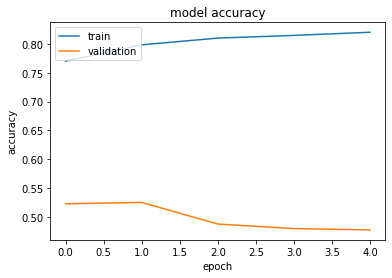

In [ ]:
plt.plot(history_RN50_6.history['loss'], label='Loss (training data)')
plt.plot(history_RN50_6.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RN50_6.history['accuracy'])
plt.plot(history_RN50_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_RN50_6.load_weights('./covid_classifier_model_RN50_6.h5')
record_RN50_6 = saved_model_RN50_6.evaluate(test_gen)

7/7 [==============================] - 243s 40s/step - loss: 1.3409 - accuracy: 0.5025 - precision: 1.0000 - recall: 0.0050 - auc: 0.7906 - true_positives: 1.0000 - true_negatives: 200.0000 - false_positives: 0.0000e+00 - false_negatives: 199.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RN50_6[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(1.0, 200.0, 0.0, 199.0)

In [ ]:
predict_RN50_6 = saved_model_RN50_6.predict(test_gen)
#predict

In [ ]:
y_pred_RN50_6 = predict_RN50_6 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RN50_6 = confusion_matrix(test_gen.classes, y_pred_RN50_6)
print(mat_RN50_6)

Confusion Matrix
[[200   0]
 [200   0]]


In [ ]:
conf_RN50_6 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RN50_6

[[200.0, 0.0], [199.0, 1.0]]

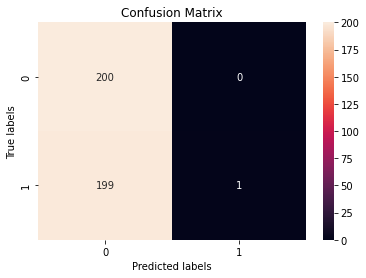

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RN50_6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

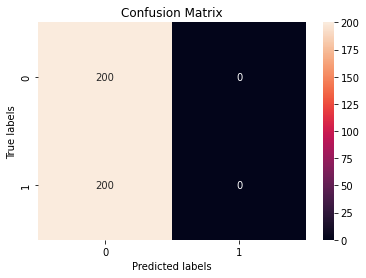

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RN50_6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RN50_6.load_weights("covid_classifier_model_RN50_6.h5")
model_RN50_6.evaluate(test_gen)

7/7 [==============================] - 20s 3s/step - loss: 1.3409 - accuracy: 0.5025 - precision: 1.0000 - recall: 0.0050 - auc: 0.7906 - true_positives: 1.0000 - true_negatives: 200.0000 - false_positives: 0.0000e+00 - false_negatives: 199.0000


[1.3408972024917603,
 0.5024999976158142,
 1.0,
 0.004999999888241291,
 0.7906000018119812,
 1.0,
 200.0,
 0.0,
 199.0]

In [ ]:

model_RN50_sm = tf.keras.Sequential([
    base_model_RN50, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(, activation='relu'),   
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')       
])

#The kernel size of the convolutional layer that was added after the concatenated features was 1 × 1 with 1024 filters and no activation function. 
#This layer was added to extract a more valuable semantic feature out of the features of a spatial point between all channels, with each channel being a feature map. 
#This convolutional layer helps the network learn better from the concatenated features extracted from Xception and ResNet50V2. 


#callbacks are used to improve the training time and stop the model early on if the epochs do not show any improvement over multiple runs

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RN50_sm.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RN50_sm.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

history_RN50_sm = model_RN50_sm.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 2487s 14s/step - loss: 0.5564 - accuracy: 0.7243 - val_loss: 0.6543 - val_accuracy: 0.5102 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 2397s 13s/step - loss: 0.4653 - accuracy: 0.7866 - val_loss: 0.5499 - val_accuracy: 0.7953 - lr: 0.0010
Epoch 3/20
180/180 [==============================] - 2359s 13s/step - loss: 0.4401 - accuracy: 0.8035 - val_loss: 0.6178 - val_accuracy: 0.7023 - lr: 0.0010
Epoch 4/20
180/180 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8038 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
180/180 [==============================] - 2317s 13s/step - loss: 0.4339 - accuracy: 0.8038 - val_loss: 1.3483 - val_accuracy: 0.4914 - lr: 0.0010
Epoch 5/20
180/180 [==============================] - 2466s 14s/step - loss: 0.4206 - accuracy: 0.8030 - val_loss: 0.4130 - val_accuracy: 0.8070 - lr: 5.0000e-04
Epoch 6/20
180/180 [========================

In [ ]:
model_RN50_sm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

###InceptionV3

In [ ]:

base_model_inp = InceptionV3(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_inp.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


#### Model 1

In [ ]:
#Model 1 128, 0.2, 0.001, ReLU, Adam
model_inp = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp = model_inp.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 360s 2s/step - loss: 0.3486 - accuracy: 0.8491 - precision: 0.8635 - recall: 0.8296 - auc: 0.9251 - true_positives: 4782.0000 - true_negatives: 4999.0000 - false_positives: 756.0000 - false_negatives: 982.0000 - val_loss: 0.3030 - val_accuracy: 0.8680 - val_precision: 0.8607 - val_recall: 0.8756 - val_auc: 0.9428 - val_true_positives: 556.0000 - val_true_negatives: 555.0000 - val_false_positives: 90.0000 - val_false_negatives: 79.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 334s 2s/step - loss: 0.3007 - accuracy: 0.8725 - precision: 0.8825 - recall: 0.8596 - auc: 0.9433 - true_positives: 4955.0000 - true_negatives: 5095.0000 - false_positives: 660.0000 - false_negatives: 809.0000 - val_loss: 0.2877 - val_accuracy: 0.8727 - val_precision: 0.8722 - val_recall: 0.8709 - val_auc: 0.9480 - val_true_positives: 553.0000 - val_true_negatives: 564.0000 - val_false_positives: 81.0000 - val_false_negatives: 82.0000 -

In [ ]:
# load the saved model
saved_model_inp = tf.keras.models.load_model('covid_classifier_model_inp.h5')
saved_model_inp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 batch_normalization_193 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_inp.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.8950429558753967 , Validation Accuracy:  0.8960937261581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2493714541196823 
 Accuracy: 0.8975605368614197 
 Precision: 0.9224106073379517 
 Recall: 0.8683205842971802 
 AUC: 0.960982084274292 
 True Positive: 5005.0 
 True Negative: 5334.0 
 False Positive: 421.0 
 False Negative: 759.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.25037112832069397 
 Accuracy: 0.8960937261581421 
 Precision: 0.9419013857841492 
 Recall: 0.8425197005271912 
 AUC: 0.963175356388092 
 True Positive: 535.0 
 True Negative: 612.0 
 False Positive: 33.0 
 False Negative: 100.0


In [ ]:
history_dict = history_inp.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


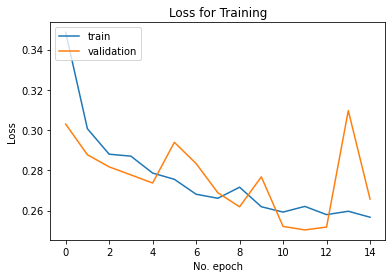

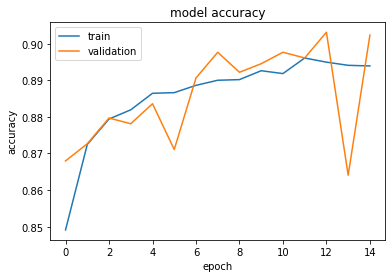

In [ ]:
plt.plot(history_inp.history['loss'], label='Loss (training data)')
plt.plot(history_inp.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp.history['accuracy'])
plt.plot(history_inp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set
saved_model_inp.load_weights('./covid_classifier_model_inp.h5')
record_inp = saved_model_inp.evaluate(test_gen)

7/7 [==============================] - 26s 4s/step - loss: 0.7072 - accuracy: 0.6600 - precision: 0.9000 - recall: 0.3600 - auc: 0.8012 - true_positives: 72.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 128.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(72.0, 192.0, 8.0, 128.0)

In [ ]:
predict_inp = saved_model_inp.predict(test_gen)
#predict

In [ ]:
y_pred_inp = predict_inp > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp = confusion_matrix(test_gen.classes, y_pred_inp)
print(mat_inp)

Confusion Matrix
[[184  16]
 [176  24]]


In [ ]:
conf_inp = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp

[[192.0, 8.0], [128.0, 72.0]]

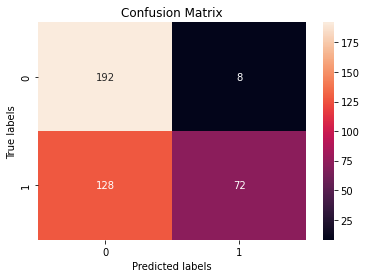

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_inp, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

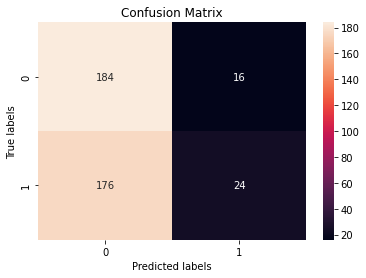

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_inp, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp.load_weights("covid_classifier_model_inp.h5")
model_inp.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.7072 - accuracy: 0.6600 - precision: 0.9000 - recall: 0.3600 - auc: 0.8012 - true_positives: 72.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 128.0000


[0.7071911096572876,
 0.6600000262260437,
 0.8999999761581421,
 0.36000001430511475,
 0.8012124300003052,
 72.0,
 192.0,
 8.0,
 128.0]

####Model 2

In [ ]:
#Model 2 256, 0.2, 0.001, ReLU, Adam
model_inp2 = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp2 = model_inp2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 349s 2s/step - loss: 0.3539 - accuracy: 0.8546 - precision: 0.8670 - recall: 0.8380 - auc: 0.9257 - true_positives: 4830.0000 - true_negatives: 5014.0000 - false_positives: 741.0000 - false_negatives: 934.0000 - val_loss: 0.3078 - val_accuracy: 0.8586 - val_precision: 0.8592 - val_recall: 0.8551 - val_auc: 0.9402 - val_true_positives: 543.0000 - val_true_negatives: 556.0000 - val_false_positives: 89.0000 - val_false_negatives: 92.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 327s 2s/step - loss: 0.3028 - accuracy: 0.8718 - precision: 0.8850 - recall: 0.8548 - auc: 0.9424 - true_positives: 4927.0000 - true_negatives: 5115.0000 - false_positives: 640.0000 - false_negatives: 837.0000 - val_loss: 0.3836 - val_accuracy: 0.8367 - val_precision: 0.7759 - val_recall: 0.9433 - val_auc: 0.9400 - val_true_positives: 599.0000 - val_true_negatives: 472.0000 - val_false_positives: 173.0000 - val_false_negatives: 36.0000 

In [ ]:
# load the saved model
saved_model_inp2 = tf.keras.models.load_model('covid_classifier_model_inp2.h5')
saved_model_inp2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_195 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_inp2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8992099761962891 , Validation Accuracy:  0.88671875


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.24824608862400055 
 Accuracy: 0.8977341651916504 
 Precision: 0.9179730415344238 
 Recall: 0.8736988306045532 
 AUC: 0.9606479406356812 
 True Positive: 5036.0 
 True Negative: 5305.0 
 False Positive: 450.0 
 False Negative: 728.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.24331584572792053 
 Accuracy: 0.88671875 
 Precision: 0.9224137663841248 
 Recall: 0.8425197005271912 
 AUC: 0.9651796817779541 
 True Positive: 535.0 
 True Negative: 600.0 
 False Positive: 45.0 
 False Negative: 100.0


In [ ]:
history_dict = history_inp2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


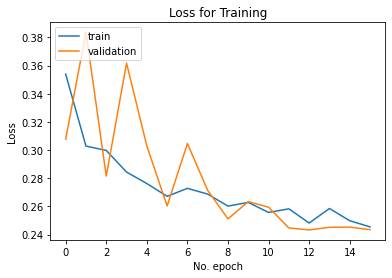

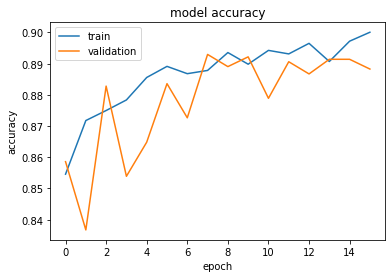

In [ ]:
plt.plot(history_inp2.history['loss'], label='Loss (training data)')
plt.plot(history_inp2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp2.history['accuracy'])
plt.plot(history_inp2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predicitons on test set
saved_model_inp2.load_weights('./covid_classifier_model_inp2.h5')
record_inp2 = saved_model_inp2.evaluate(test_gen)

7/7 [==============================] - 25s 4s/step - loss: 0.7211 - accuracy: 0.6850 - precision: 0.9111 - recall: 0.4100 - auc: 0.8025 - true_positives: 82.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 118.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(82.0, 192.0, 8.0, 118.0)

In [ ]:
predict_inp2 = saved_model_inp2.predict(test_gen)
#predict

In [ ]:
y_pred_inp2 = predict_inp2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp2 = confusion_matrix(test_gen.classes, y_pred_inp2)
print(mat_inp2)

Confusion Matrix
[[177  23]
 [179  21]]


In [ ]:
conf_inp2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp2

[[192.0, 8.0], [118.0, 82.0]]

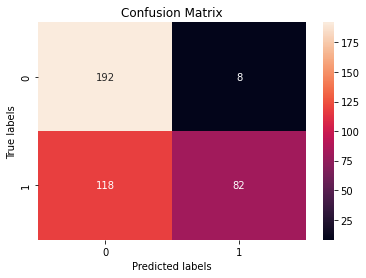

In [ ]:

ax= plt.subplot()
sns.heatmap(conf_inp2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

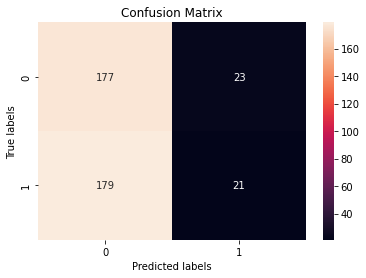

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_inp2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp2.load_weights("covid_classifier_model_inp2.h5")
model_inp2.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.7211 - accuracy: 0.6850 - precision: 0.9111 - recall: 0.4100 - auc: 0.8025 - true_positives: 82.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 118.0000


[0.7210600972175598,
 0.6850000023841858,
 0.9111111164093018,
 0.4099999964237213,
 0.8024624586105347,
 82.0,
 192.0,
 8.0,
 118.0]

TRAIN- 

VALIDATION-

TEST- loss: 0.7211 - accuracy: 0.6850 - precision: 0.9111 - recall: 0.4100 - auc: 0.8025 - true_positives: 82.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 118.0000/n

####Model 3 Best Results

In [ ]:
#Model 3 256, 0.2, 0.0001, ReLU, Adam
model_inp3 = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy' ,'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp3 = model_inp3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 349s 2s/step - loss: 0.4002 - accuracy: 0.8213 - precision: 0.8396 - recall: 0.7946 - auc: 0.9022 - true_positives: 4580.0000 - true_negatives: 4880.0000 - false_positives: 875.0000 - false_negatives: 1184.0000 - val_loss: 0.3274 - val_accuracy: 0.8555 - val_precision: 0.8617 - val_recall: 0.8441 - val_auc: 0.9350 - val_true_positives: 536.0000 - val_true_negatives: 559.0000 - val_false_positives: 86.0000 - val_false_negatives: 99.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 338s 2s/step - loss: 0.3312 - accuracy: 0.8622 - precision: 0.8787 - recall: 0.8407 - auc: 0.9324 - true_positives: 4846.0000 - true_negatives: 5086.0000 - false_positives: 669.0000 - false_negatives: 918.0000 - val_loss: 0.3042 - val_accuracy: 0.8641 - val_precision: 0.8688 - val_recall: 0.8551 - val_auc: 0.9434 - val_true_positives: 543.0000 - val_true_negatives: 563.0000 - val_false_positives: 82.0000 - val_false_negatives: 92.0

In [ ]:
# load the saved model
saved_model_inp3 = tf.keras.models.load_model('covid_classifier_model_inp3.h5')
saved_model_inp3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_196 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp3.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_inp3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.9056341648101807 , Validation Accuracy:  0.890625


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2403929978609085 
 Accuracy: 0.8995572328567505 
 Precision: 0.9193518757820129 
 Recall: 0.8761276602745056 
 AUC: 0.9637589454650879 
 True Positive: 5050.0 
 True Negative: 5312.0 
 False Positive: 443.0 
 False Negative: 714.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.24751737713813782 
 Accuracy: 0.890625 
 Precision: 0.9159663915634155 
 Recall: 0.8582677245140076 
 AUC: 0.9633461236953735 
 True Positive: 545.0 
 True Negative: 595.0 
 False Positive: 50.0 
 False Negative: 90.0


In [ ]:
history_dict = history_inp3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


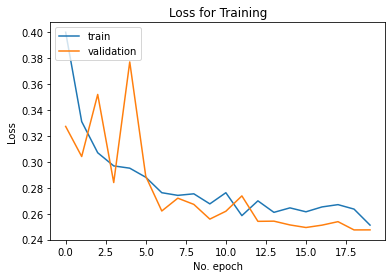

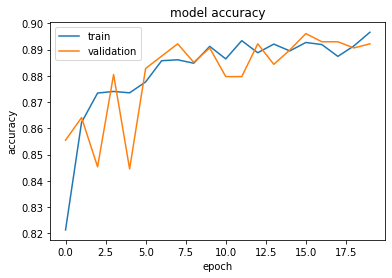

In [ ]:
plt.plot(history_inp3.history['loss'], label='Loss (training data)')
plt.plot(history_inp3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp3.history['accuracy'])
plt.plot(history_inp3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set
saved_model_inp3.load_weights('./covid_classifier_model_inp3.h5')
record_inp3 = saved_model_inp3.evaluate(test_gen)

7/7 [==============================] - 26s 4s/step - loss: 0.7255 - accuracy: 0.6875 - precision: 0.9213 - recall: 0.4100 - auc: 0.7848 - true_positives: 82.0000 - true_negatives: 193.0000 - false_positives: 7.0000 - false_negatives: 118.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(82.0, 193.0, 7.0, 118.0)

In [ ]:
predict_inp3 = saved_model_inp3.predict(test_gen)
#predict

In [ ]:
y_pred_inp3 = predict_inp3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp3 = confusion_matrix(test_gen.classes, y_pred_inp3)
print(mat_inp3)

Confusion Matrix
[[177  23]
 [176  24]]


In [ ]:
conf_inp3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp3

[[193.0, 7.0], [118.0, 82.0]]

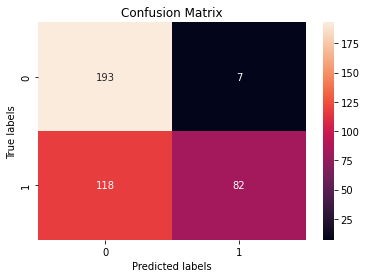

In [ ]:
ax= plt.subplot()
sns.heatmap(conf_inp3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

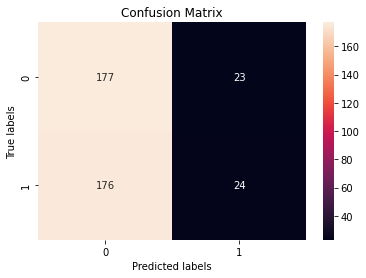

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_inp3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp3.load_weights("covid_classifier_model_inp3.h5")
model_inp3.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.7255 - accuracy: 0.6875 - precision: 0.9213 - recall: 0.4100 - auc: 0.7848 - true_positives: 82.0000 - true_negatives: 193.0000 - false_positives: 7.0000 - false_negatives: 118.0000


[0.7254985570907593,
 0.6875,
 0.9213483333587646,
 0.4099999964237213,
 0.7848374843597412,
 82.0,
 193.0,
 7.0,
 118.0]

#### Model 4

In [ ]:
#Model 4 512, 0.2, 0.001, ReLU, Adam
model_inp4 = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp4.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp4 = model_inp4.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 368s 2s/step - loss: 0.3660 - accuracy: 0.8467 - precision: 0.8575 - recall: 0.8319 - auc: 0.9218 - true_positives: 4795.0000 - true_negatives: 4958.0000 - false_positives: 797.0000 - false_negatives: 969.0000 - val_loss: 0.4008 - val_accuracy: 0.8445 - val_precision: 0.9561 - val_recall: 0.7197 - val_auc: 0.9419 - val_true_positives: 457.0000 - val_true_negatives: 624.0000 - val_false_positives: 21.0000 - val_false_negatives: 178.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 337s 2s/step - loss: 0.3077 - accuracy: 0.8696 - precision: 0.8809 - recall: 0.8550 - auc: 0.9408 - true_positives: 4928.0000 - true_negatives: 5089.0000 - false_positives: 666.0000 - false_negatives: 836.0000 - val_loss: 0.2884 - val_accuracy: 0.8781 - val_precision: 0.8844 - val_recall: 0.8677 - val_auc: 0.9482 - val_true_positives: 551.0000 - val_true_negatives: 573.0000 - val_false_positives: 72.0000 - val_false_negatives: 84.0000 

In [ ]:
# load the saved model
saved_model_inp4 = tf.keras.models.load_model('covid_classifier_model_inp4.h5')
saved_model_inp4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_197 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp4.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_inp4.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8993836045265198 , Validation Accuracy:  0.889843761920929


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp4.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2507692873477936 
 Accuracy: 0.8969528675079346 
 Precision: 0.9294426441192627 
 Recall: 0.8592991232872009 
 AUC: 0.9611179232597351 
 True Positive: 4953.0 
 True Negative: 5379.0 
 False Positive: 376.0 
 False Negative: 811.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp4.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.24555356800556183 
 Accuracy: 0.889843761920929 
 Precision: 0.9200680255889893 
 Recall: 0.85196852684021 
 AUC: 0.9644924998283386 
 True Positive: 541.0 
 True Negative: 598.0 
 False Positive: 47.0 
 False Negative: 94.0


In [ ]:
history_dict = history_inp4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


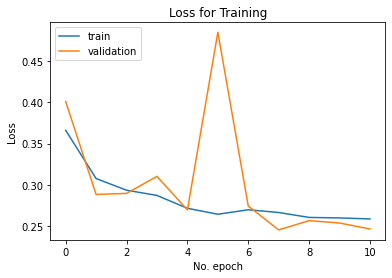

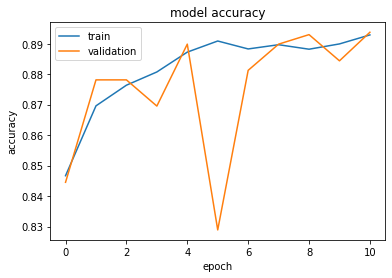

In [ ]:
plt.plot(history_inp4.history['loss'], label='Loss (training data)')
plt.plot(history_inp4.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp4.history['accuracy'])
plt.plot(history_inp4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set
saved_model_inp4.load_weights('./covid_classifier_model_inp4.h5')
record_inp4 = saved_model_inp4.evaluate(test_gen)

7/7 [==============================] - 26s 4s/step - loss: 0.7343 - accuracy: 0.6600 - precision: 0.8636 - recall: 0.3800 - auc: 0.7918 - true_positives: 76.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 124.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp4[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(76.0, 188.0, 12.0, 124.0)

In [ ]:
predict_inp4 = saved_model_inp4.predict(test_gen)
#predict

In [ ]:
y_pred_inp4 = predict_inp4 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp4 = confusion_matrix(test_gen.classes, y_pred_inp4)
print(mat_inp4)

Confusion Matrix
[[180  20]
 [185  15]]


In [ ]:
conf_inp4 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp4

[[188.0, 12.0], [124.0, 76.0]]

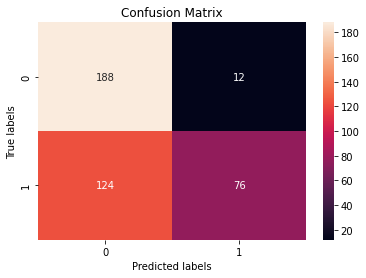

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_inp4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

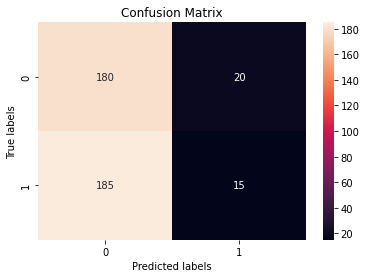

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_inp4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp4.load_weights("covid_classifier_model_inp4.h5")
model_inp4.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.7343 - accuracy: 0.6600 - precision: 0.8636 - recall: 0.3800 - auc: 0.7918 - true_positives: 76.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 124.0000


[0.7343139052391052,
 0.6600000262260437,
 0.8636363744735718,
 0.3799999952316284,
 0.7917749881744385,
 76.0,
 188.0,
 12.0,
 124.0]

####Model 5

In [ ]:
#Model 5 512, 256, 0.2, 0.001, ReLU, Adam
model_inp5 = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp5.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp5.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['Accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp5 = model_inp5.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 2008s 11s/step - loss: 0.3529 - Accuracy: 0.8449 - precision: 0.8572 - recall: 0.8272 - auc: 0.9237 - true_positives: 4759.0000 - true_negatives: 4973.0000 - false_positives: 793.0000 - false_negatives: 994.0000 - val_loss: 0.4449 - val_Accuracy: 0.7602 - val_precision: 0.6941 - val_recall: 0.9397 - val_auc: 0.9272 - val_true_positives: 608.0000 - val_true_negatives: 365.0000 - val_false_positives: 268.0000 - val_false_negatives: 39.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 294s 2s/step - loss: 0.2953 - Accuracy: 0.8708 - precision: 0.8865 - recall: 0.8502 - auc: 0.9454 - true_positives: 4891.0000 - true_negatives: 5140.0000 - false_positives: 626.0000 - false_negatives: 862.0000 - val_loss: 0.3693 - val_Accuracy: 0.8234 - val_precision: 0.7766 - val_recall: 0.9134 - val_auc: 0.9372 - val_true_positives: 591.0000 - val_true_negatives: 463.0000 - val_false_positives: 170.0000 - val_false_negatives: 56.00

In [ ]:
# load the saved model
saved_model_inp5 = tf.keras.models.load_model('covid_classifier_model_inp5.h5')
saved_model_inp5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_95 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp5.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_inp5.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9019880294799805 , Validation Accuracy:  0.889843761920929


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp5.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.22940677404403687 
 Accuracy: 0.9025956988334656 
 Precision: 0.9168316721916199 
 Recall: 0.885277271270752 
 AUC: 0.9668489694595337 
 True Positive: 5093.0 
 True Negative: 5304.0 
 False Positive: 462.0 
 False Negative: 660.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp5.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.2573731541633606 
 Accuracy: 0.889843761920929 
 Precision: 0.9377162456512451 
 Recall: 0.8377125263214111 
 AUC: 0.9588403701782227 
 True Positive: 542.0 
 True Negative: 597.0 
 False Positive: 36.0 
 False Negative: 105.0


In [ ]:
history_dict = history_inp5.history
print(history_dict.keys())

dict_keys(['loss', 'Accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_Accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


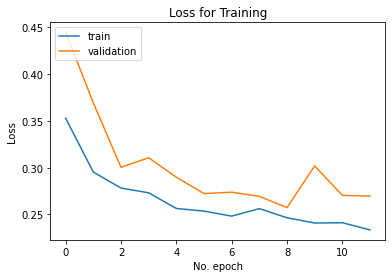

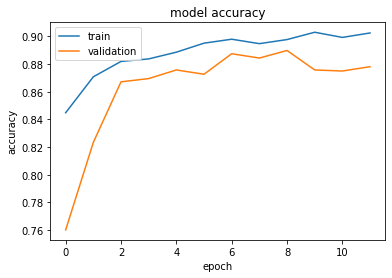

In [ ]:
plt.plot(history_inp5.history['loss'], label='Loss (training data)')
plt.plot(history_inp5.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp5.history['Accuracy'])
plt.plot(history_inp5.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set 
saved_model_inp5.load_weights('./covid_classifier_model_inp5.h5')
record_inp5 = saved_model_inp5.evaluate(test_gen)

7/7 [==============================] - 137s 22s/step - loss: 0.7743 - Accuracy: 0.6800 - precision: 0.9091 - recall: 0.4000 - auc: 0.7897 - true_positives: 80.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 120.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp5[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(80.0, 192.0, 8.0, 120.0)

In [ ]:
predict_inp5 = saved_model_inp5.predict(test_gen)
#predict

In [ ]:


y_pred_inp5 = predict_inp5 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp5 = confusion_matrix(test_gen.classes, y_pred_inp5)
print(mat_inp5)

Confusion Matrix
[[185  15]
 [177  23]]


In [ ]:
conf_inp5 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp5

[[192.0, 8.0], [120.0, 80.0]]

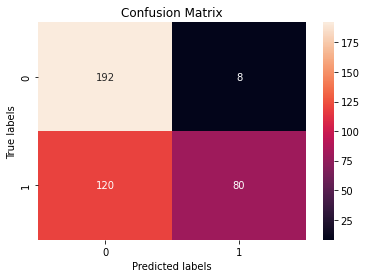

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_inp5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

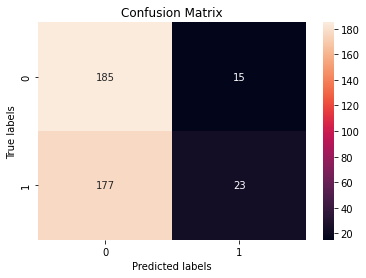

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_inp5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp5.load_weights("covid_classifier_model_inp5.h5")
model_inp5.evaluate(test_gen)

7/7 [==============================] - 20s 3s/step - loss: 0.7743 - Accuracy: 0.6800 - precision: 0.9091 - recall: 0.4000 - auc: 0.7897 - true_positives: 80.0000 - true_negatives: 192.0000 - false_positives: 8.0000 - false_negatives: 120.0000


[0.7742891907691956,
 0.6800000071525574,
 0.9090909361839294,
 0.4000000059604645,
 0.7896999716758728,
 80.0,
 192.0,
 8.0,
 120.0]

####Model 6

In [ ]:
model_inp6 = tf.keras.Sequential([
    base_model_inp, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inp6.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_inp6.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
             metrics=['Accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_inp6 = model_inp6.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 3517s 19s/step - loss: 0.3908 - Accuracy: 0.8217 - precision: 0.8384 - recall: 0.7977 - auc: 0.9037 - true_positives: 4601.0000 - true_negatives: 4864.0000 - false_positives: 887.0000 - false_negatives: 1167.0000 - val_loss: 0.3456 - val_Accuracy: 0.8492 - val_precision: 0.8883 - val_recall: 0.7940 - val_auc: 0.9254 - val_true_positives: 501.0000 - val_true_negatives: 586.0000 - val_false_positives: 63.0000 - val_false_negatives: 130.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 333s 2s/step - loss: 0.3186 - Accuracy: 0.8627 - precision: 0.8770 - recall: 0.8441 - auc: 0.9366 - true_positives: 4869.0000 - true_negatives: 5068.0000 - false_positives: 683.0000 - false_negatives: 899.0000 - val_loss: 0.3314 - val_Accuracy: 0.8625 - val_precision: 0.9541 - val_recall: 0.7575 - val_auc: 0.9421 - val_true_positives: 478.0000 - val_true_negatives: 626.0000 - val_false_positives: 23.0000 - val_false_negatives: 1

In [ ]:
# load the saved model
saved_model_inp6 = tf.keras.models.load_model('covid_classifier_model_inp6.h5')
saved_model_inp6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization_94 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_inp6.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_inp6.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8869693279266357 , Validation Accuracy:  0.878125011920929


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_inp6.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.26359817385673523 
 Accuracy: 0.8907023072242737 
 Precision: 0.9025173783302307 
 Recall: 0.8763869404792786 
 AUC: 0.9562201499938965 
 True Positive: 5055.0 
 True Negative: 5205.0 
 False Positive: 546.0 
 False Negative: 713.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_inp6.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

In [ ]:
history_dict = history_inp6.history
print(history_dict.keys())

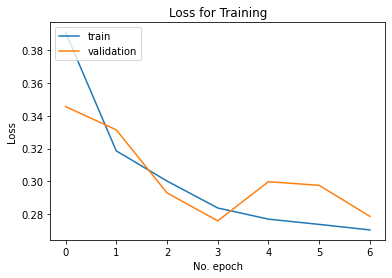

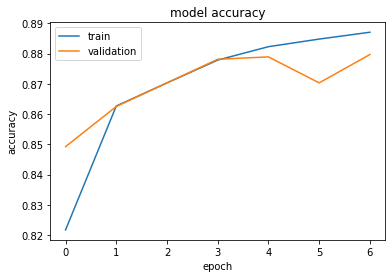

In [ ]:
plt.plot(history_inp6.history['loss'], label='Loss (training data)')
plt.plot(history_inp6.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_inp6.history['Accuracy'])
plt.plot(history_inp6.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_inp6.load_weights('./covid_classifier_model_inp6.h5')
record_inp6 = saved_model_inp6.evaluate(test_gen)

7/7 [==============================] - 152s 25s/step - loss: 0.7467 - Accuracy: 0.6600 - precision: 0.8333 - recall: 0.4000 - auc: 0.7732 - true_positives: 80.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 120.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_inp6[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(80.0, 184.0, 16.0, 120.0)

In [ ]:
predict_inp6 = saved_model_inp6.predict(test_gen)
#predict

In [ ]:


y_pred_inp6 = predict_inp6 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_inp6 = confusion_matrix(test_gen.classes, y_pred_inp6)
print(mat_inp6)

Confusion Matrix
[[177  23]
 [185  15]]


In [ ]:
conf_inp6 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_inp6

[[184.0, 16.0], [120.0, 80.0]]

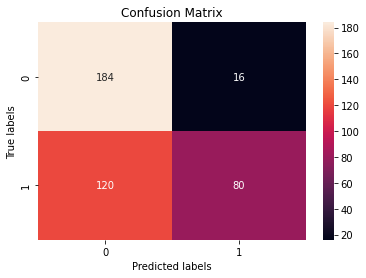

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_inp6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

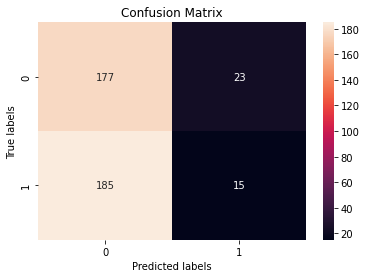

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_inp6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_inp6.load_weights("covid_classifier_model_inp6.h5")
model_inp6.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.7467 - Accuracy: 0.6600 - precision: 0.8333 - recall: 0.4000 - auc: 0.7732 - true_positives: 80.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 120.0000


[0.7466727495193481,
 0.6600000262260437,
 0.8333333134651184,
 0.4000000059604645,
 0.7731750011444092,
 80.0,
 184.0,
 16.0,
 120.0]

###InceptionResNetV2

In [ ]:

base_model_RNv2 = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_RNv2.layers:
    layer.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


####Model 1

In [ ]:
#Model 1 128, 0.2, 0.001, ReLU, Adam
model_RNv2 = tf.keras.Sequential([
    base_model_RNv2, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RNv2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RNv2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_RNv2 = model_RNv2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 5857s 32s/step - loss: 0.3294 - accuracy: 0.8619 - precision: 0.8720 - recall: 0.8465 - auc: 0.9356 - true_positives: 4849.0000 - true_negatives: 5079.0000 - false_positives: 712.0000 - false_negatives: 879.0000 - val_loss: 0.2843 - val_accuracy: 0.8930 - val_precision: 0.9308 - val_recall: 0.8601 - val_auc: 0.9579 - val_true_positives: 578.0000 - val_true_negatives: 565.0000 - val_false_positives: 43.0000 - val_false_negatives: 94.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 306s 2s/step - loss: 0.2676 - accuracy: 0.8892 - precision: 0.9011 - recall: 0.8731 - auc: 0.9552 - true_positives: 5001.0000 - true_negatives: 5242.0000 - false_positives: 549.0000 - false_negatives: 727.0000 - val_loss: 0.2704 - val_accuracy: 0.8883 - val_precision: 0.8599 - val_recall: 0.9405 - val_auc: 0.9674 - val_true_positives: 632.0000 - val_true_negatives: 505.0000 - val_false_positives: 103.0000 - val_false_negatives: 40.000

In [ ]:
# load the saved model
saved_model_RNv2 = tf.keras.models.load_model('covid_classifier_model_RNv2.h5')
saved_model_RNv2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RNv2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_RNv2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9269033670425415 , Validation Accuracy:  0.94140625


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RNv2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.18550647795200348 
 Accuracy: 0.9253407120704651 
 Precision: 0.9452981948852539 
 Recall: 0.9020600318908691 
 AUC: 0.978749692440033 
 True Positive: 5167.0 
 True Negative: 5492.0 
 False Positive: 299.0 
 False Negative: 561.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RNv2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.15837343037128448 
 Accuracy: 0.94140625 
 Precision: 0.947526216506958 
 Recall: 0.9404761791229248 
 AUC: 0.983788788318634 
 True Positive: 632.0 
 True Negative: 573.0 
 False Positive: 35.0 
 False Negative: 40.0


In [ ]:
history_dict = history_RNv2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


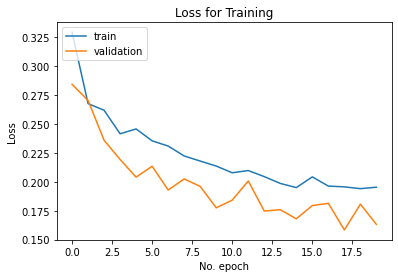

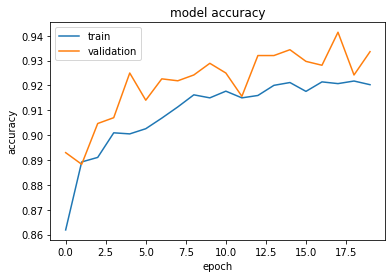

In [ ]:
plt.plot(history_RNv2.history['loss'], label='Loss (training data)')
plt.plot(history_RNv2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RNv2.history['accuracy'])
plt.plot(history_RNv2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_RNv2.load_weights('./covid_classifier_model_RNv2.h5')
record_RNv2 = saved_model_RNv2.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.3459 - accuracy: 0.8450 - precision: 0.9312 - recall: 0.7450 - auc: 0.9464 - true_positives: 149.0000 - true_negatives: 189.0000 - false_positives: 11.0000 - false_negatives: 51.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RNv2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(149.0, 189.0, 11.0, 51.0)

In [ ]:
predict_RNv2 = saved_model_RNv2.predict(test_gen)
#predict

In [ ]:
y_pred_RNv2 = predict_RNv2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RNv2 = confusion_matrix(test_gen.classes, y_pred_RNv2)
print(mat_RNv2)

Confusion Matrix
[[147  53]
 [142  58]]


In [ ]:
conf_RNv2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RNv2

[[189.0, 11.0], [51.0, 149.0]]

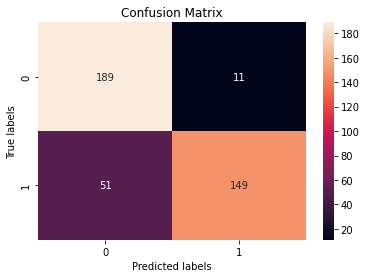

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RNv2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

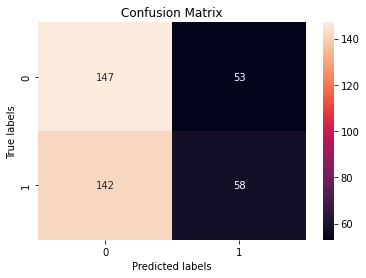

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RNv2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RNv2.load_weights("covid_classifier_model_RNv2.h5")
model_RNv2.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.3459 - accuracy: 0.8450 - precision: 0.9312 - recall: 0.7450 - auc: 0.9464 - true_positives: 149.0000 - true_negatives: 189.0000 - false_positives: 11.0000 - false_negatives: 51.0000


[0.3459411561489105,
 0.8450000286102295,
 0.9312499761581421,
 0.7450000047683716,
 0.9464249610900879,
 149.0,
 189.0,
 11.0,
 51.0]

####Model 2

In [ ]:
#Model 4 512, 0.2, 0.001, ReLU, Adam
model_RNv2_1 = tf.keras.Sequential([
    base_model_RNv2, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RNv2_1.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RNv2_1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_RNv2_1 = model_RNv2_1.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 388s 2s/step - loss: 0.3271 - accuracy: 0.8684 - precision: 0.8804 - recall: 0.8509 - auc: 0.9366 - true_positives: 4874.0000 - true_negatives: 5129.0000 - false_positives: 662.0000 - false_negatives: 854.0000 - val_loss: 0.3157 - val_accuracy: 0.8633 - val_precision: 0.8223 - val_recall: 0.9435 - val_auc: 0.9618 - val_true_positives: 634.0000 - val_true_negatives: 471.0000 - val_false_positives: 137.0000 - val_false_negatives: 38.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 307s 2s/step - loss: 0.2632 - accuracy: 0.8895 - precision: 0.9003 - recall: 0.8747 - auc: 0.9569 - true_positives: 5010.0000 - true_negatives: 5236.0000 - false_positives: 555.0000 - false_negatives: 718.0000 - val_loss: 0.2333 - val_accuracy: 0.9086 - val_precision: 0.9173 - val_recall: 0.9077 - val_auc: 0.9672 - val_true_positives: 610.0000 - val_true_negatives: 553.0000 - val_false_positives: 55.0000 - val_false_negatives: 62.0000 

In [ ]:
# load the saved model
saved_model_RNv2_1 = tf.keras.models.load_model('covid_classifier_model_RNv2_1.h5')
saved_model_RNv2_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_RNv2_1.evaluate(train_gen, verbose=0)
_,val_acc,_,_,_,_,_,_,_ = saved_model_RNv2_1.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  val_acc)

Training Accuracy:  0.9243857860565186 , Validation Accuracy:  0.936718761920929


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RNv2_1.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.19089855253696442 
 Accuracy: 0.9251671433448792 
 Precision: 0.9372753500938416 
 Recall: 0.9104399681091309 
 AUC: 0.9772619605064392 
 True Positive: 5215.0 
 True Negative: 5442.0 
 False Positive: 349.0 
 False Negative: 513.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RNv2_1.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.16632020473480225 
 Accuracy: 0.936718761920929 
 Precision: 0.9443609118461609 
 Recall: 0.9345238208770752 
 AUC: 0.981619119644165 
 True Positive: 628.0 
 True Negative: 571.0 
 False Positive: 37.0 
 False Negative: 44.0


In [ ]:
history_dict = history_RNv2_1.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


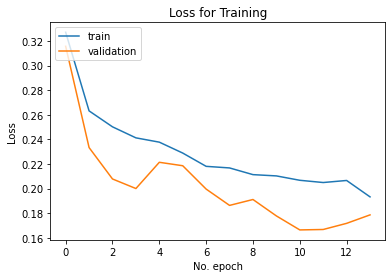

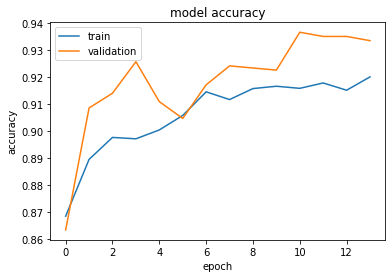

In [ ]:
plt.plot(history_RNv2_1.history['loss'], label='Loss (training data)')
plt.plot(history_RNv2_1.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RNv2_1.history['accuracy'])
plt.plot(history_RNv2_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_RNv2_1.load_weights('./covid_classifier_model_RNv2_1.h5')
record_RNv2_1 = saved_model_RNv2_1.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.4422 - accuracy: 0.7900 - precision: 0.9085 - recall: 0.6450 - auc: 0.9286 - true_positives: 129.0000 - true_negatives: 187.0000 - false_positives: 13.0000 - false_negatives: 71.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RNv2_1[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(129.0, 187.0, 13.0, 71.0)

In [ ]:
predict_RNv2_1 = saved_model_RNv2_1.predict(test_gen)
#predict

In [ ]:


y_pred_RNv2_1 = predict_RNv2_1 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RNv2_1 = confusion_matrix(test_gen.classes, y_pred_RNv2_1)
print(mat_RNv2_1)

Confusion Matrix
[[155  45]
 [153  47]]


In [ ]:
conf_RNv2_1 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RNv2_1

[[187.0, 13.0], [71.0, 129.0]]

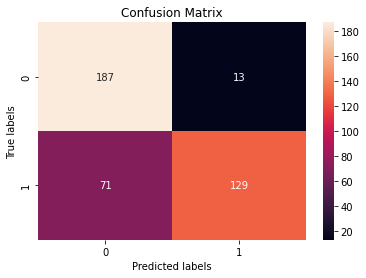

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RNv2_1, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

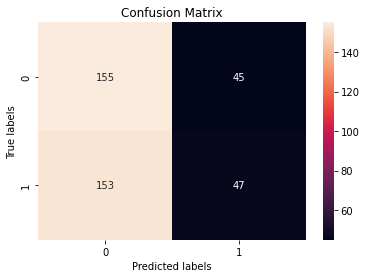

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RNv2_1, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RNv2_1.load_weights("covid_classifier_model_RNv2_1.h5")
model_RNv2_1.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.4422 - accuracy: 0.7900 - precision: 0.9085 - recall: 0.6450 - auc: 0.9286 - true_positives: 129.0000 - true_negatives: 187.0000 - false_positives: 13.0000 - false_negatives: 71.0000


[0.4421672523021698,
 0.7900000214576721,
 0.908450722694397,
 0.6449999809265137,
 0.9285750389099121,
 129.0,
 187.0,
 13.0,
 71.0]

####Model 3


In [ ]:
#Model 3 128, 0.2, 0.0001, ReLU, Adam
model_RNv2_2 = tf.keras.Sequential([
    base_model_RNv2, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RNv2_2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RNv2_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_RNv2_2 = model_RNv2_2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 362s 2s/step - loss: 0.4355 - accuracy: 0.8091 - precision: 0.8214 - recall: 0.7899 - auc: 0.8855 - true_positives: 4548.0000 - true_negatives: 4772.0000 - false_positives: 989.0000 - false_negatives: 1210.0000 - val_loss: 0.3067 - val_accuracy: 0.8766 - val_precision: 0.8758 - val_recall: 0.8785 - val_auc: 0.9417 - val_true_positives: 564.0000 - val_true_negatives: 558.0000 - val_false_positives: 80.0000 - val_false_negatives: 78.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 429s 2s/step - loss: 0.3163 - accuracy: 0.8691 - precision: 0.8859 - recall: 0.8472 - auc: 0.9380 - true_positives: 4878.0000 - true_negatives: 5133.0000 - false_positives: 628.0000 - false_negatives: 880.0000 - val_loss: 0.2879 - val_accuracy: 0.8836 - val_precision: 0.8674 - val_recall: 0.9065 - val_auc: 0.9519 - val_true_positives: 582.0000 - val_true_negatives: 549.0000 - val_false_positives: 89.0000 - val_false_negatives: 60.0

In [ ]:
# load the saved model
saved_model_RNv2_2 = tf.keras.models.load_model('covid_classifier_model_RNv2_2.h5')
saved_model_RNv2_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RNv2_2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_RNv2_2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9231703877449036 , Validation Accuracy:  0.9164062738418579


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RNv2_2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.19473081827163696 
 Accuracy: 0.9236912727355957 
 Precision: 0.9332267642021179 
 Recall: 0.9126432538032532 
 AUC: 0.9763087034225464 
 True Positive: 5255.0 
 True Negative: 5385.0 
 False Positive: 376.0 
 False Negative: 503.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RNv2_2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.19921724498271942 
 Accuracy: 0.9164062738418579 
 Precision: 0.9109063148498535 
 Recall: 0.9236760139465332 
 AUC: 0.9754989743232727 
 True Positive: 593.0 
 True Negative: 580.0 
 False Positive: 58.0 
 False Negative: 49.0


In [ ]:
history_dict = history_RNv2_2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


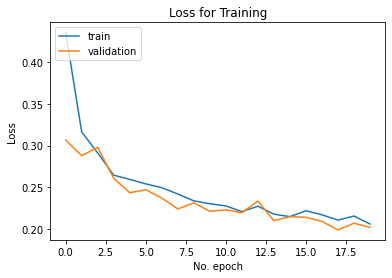

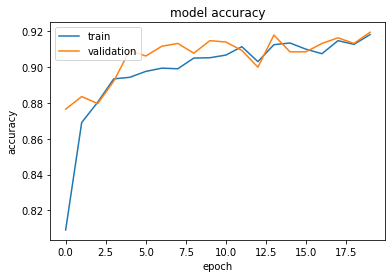

In [ ]:
plt.plot(history_RNv2_2.history['loss'], label='Loss (training data)')
plt.plot(history_RNv2_2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RNv2_2.history['accuracy'])
plt.plot(history_RNv2_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set
saved_model_RNv2_2.load_weights('./covid_classifier_model_RNv2_2.h5')
record_RNv2_2 = saved_model_RNv2_2.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.4254 - accuracy: 0.8000 - precision: 0.9167 - recall: 0.6600 - auc: 0.9256 - true_positives: 132.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 68.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RNv2_2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(132.0, 188.0, 12.0, 68.0)

In [ ]:
predict_RNv2_2 = saved_model_RNv2_2.predict(test_gen)
#predict

In [ ]:


y_pred_RNv2_2 = predict_RNv2_2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RNv2_2 = confusion_matrix(test_gen.classes, y_pred_RNv2_2)
print(mat_RNv2_2)

Confusion Matrix
[[163  37]
 [148  52]]


In [ ]:
conf_RNv2_2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RNv2_2

[[188.0, 12.0], [68.0, 132.0]]

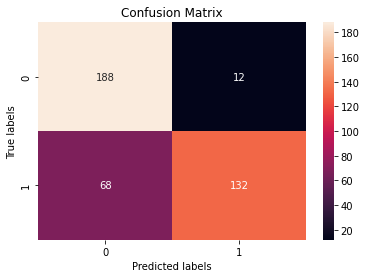

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RNv2_2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

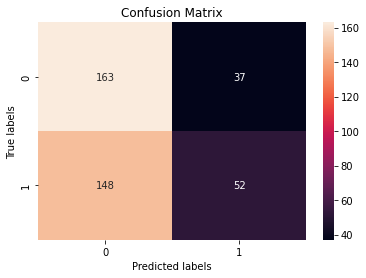

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RNv2_2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RNv2_2.load_weights("covid_classifier_model_RNv2_2.h5")
model_RNv2_2.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.4254 - accuracy: 0.8000 - precision: 0.9167 - recall: 0.6600 - auc: 0.9256 - true_positives: 132.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 68.0000


[0.42535296082496643,
 0.800000011920929,
 0.9166666865348816,
 0.6600000262260437,
 0.925599992275238,
 132.0,
 188.0,
 12.0,
 68.0]

####Model 4

In [ ]:
#Model 4 256, 128, 0.2, 0.001, ReLU, Adam
model_RNv2_3 = tf.keras.Sequential([
    base_model_RNv2, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256 , activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RNv2_3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RNv2_3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_RNv2_3 = model_RNv2_3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 325s 2s/step - loss: 0.3096 - accuracy: 0.8673 - precision: 0.8818 - recall: 0.8467 - auc: 0.9402 - true_positives: 4850.0000 - true_negatives: 5141.0000 - false_positives: 650.0000 - false_negatives: 878.0000 - val_loss: 0.3268 - val_accuracy: 0.8633 - val_precision: 0.8190 - val_recall: 0.9494 - val_auc: 0.9593 - val_true_positives: 638.0000 - val_true_negatives: 467.0000 - val_false_positives: 141.0000 - val_false_negatives: 34.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 307s 2s/step - loss: 0.2617 - accuracy: 0.8911 - precision: 0.9045 - recall: 0.8733 - auc: 0.9570 - true_positives: 5002.0000 - true_negatives: 5263.0000 - false_positives: 528.0000 - false_negatives: 726.0000 - val_loss: 0.2199 - val_accuracy: 0.9102 - val_precision: 0.9634 - val_recall: 0.8616 - val_auc: 0.9728 - val_true_positives: 579.0000 - val_true_negatives: 586.0000 - val_false_positives: 22.0000 - val_false_negatives: 93.0000 

In [ ]:
# load the saved model
saved_model_RNv2_3 = tf.keras.models.load_model('covid_classifier_model_RNv2_3.h5')
saved_model_RNv2_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RNv2_3.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_RNv2_3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9283791780471802 , Validation Accuracy:  0.9359375238418579


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RNv2_3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.18545472621917725 
 Accuracy: 0.92473304271698 
 Precision: 0.9413473606109619 
 Recall: 0.9050279259681702 
 AUC: 0.9786592721939087 
 True Positive: 5184.0 
 True Negative: 5468.0 
 False Positive: 323.0 
 False Negative: 544.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RNv2_3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.16084741055965424 
 Accuracy: 0.9359375238418579 
 Precision: 0.9510703086853027 
 Recall: 0.925595223903656 
 AUC: 0.9831928610801697 
 True Positive: 622.0 
 True Negative: 576.0 
 False Positive: 32.0 
 False Negative: 50.0


In [ ]:
history_dict = history_RNv2_3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


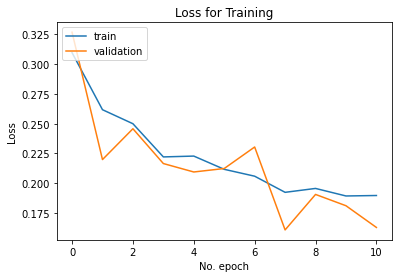

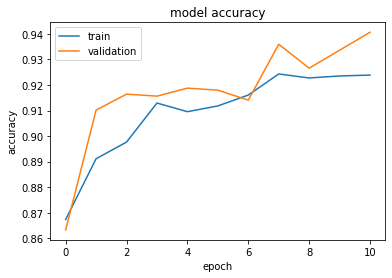

In [ ]:
plt.plot(history_RNv2_3.history['loss'], label='Loss (training data)')
plt.plot(history_RNv2_3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RNv2_3.history['accuracy'])
plt.plot(history_RNv2_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_RNv2_3.load_weights('./covid_classifier_model_RNv2_3.h5')
record_RNv2_3 = saved_model_RNv2_3.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.4127 - accuracy: 0.8300 - precision: 0.9521 - recall: 0.6950 - auc: 0.9303 - true_positives: 139.0000 - true_negatives: 193.0000 - false_positives: 7.0000 - false_negatives: 61.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RNv2_3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(139.0, 193.0, 7.0, 61.0)

In [ ]:
predict_RNv2_3 = saved_model_RNv2_3.predict(test_gen)
#predict

In [ ]:
y_pred_RNv2_3 = predict_RNv2_3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RNv2_3 = confusion_matrix(test_gen.classes, y_pred_RNv2_3)
print(mat_RNv2_3)

Confusion Matrix
[[153  47]
 [157  43]]


In [ ]:
conf_RNv2_3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RNv2_3

[[193.0, 7.0], [61.0, 139.0]]

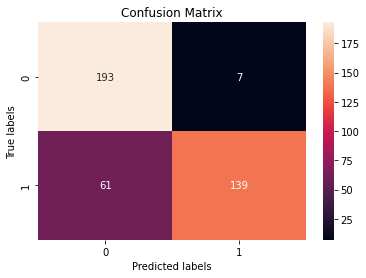

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RNv2_3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

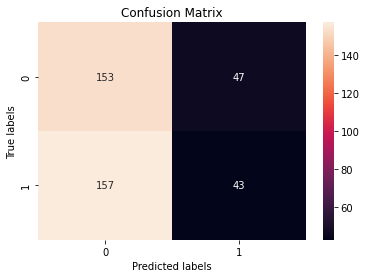

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_RNv2_3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RNv2_3.load_weights("covid_classifier_model_RNv2_3.h5")
model_RNv2_3.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.4127 - accuracy: 0.8300 - precision: 0.9521 - recall: 0.6950 - auc: 0.9303 - true_positives: 139.0000 - true_negatives: 193.0000 - false_positives: 7.0000 - false_negatives: 61.0000


[0.412693589925766,
 0.8299999833106995,
 0.9520547986030579,
 0.6949999928474426,
 0.9302999973297119,
 139.0,
 193.0,
 7.0,
 61.0]

####Model 5




In [ ]:
#Model 5 512, 256, 0.2, 0.0001, ReLU, Adam
model_RNv2_4 = tf.keras.Sequential([
    base_model_RNv2, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(512 , activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_RNv2_4.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_RNv2_4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_RNv2_4 = model_RNv2_4.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 308s 2s/step - loss: 0.3641 - accuracy: 0.8371 - precision: 0.8463 - recall: 0.8235 - auc: 0.9164 - true_positives: 4742.0000 - true_negatives: 4900.0000 - false_positives: 861.0000 - false_negatives: 1016.0000 - val_loss: 0.2752 - val_accuracy: 0.8859 - val_precision: 0.8987 - val_recall: 0.8707 - val_auc: 0.9524 - val_true_positives: 559.0000 - val_true_negatives: 575.0000 - val_false_positives: 63.0000 - val_false_negatives: 83.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 291s 2s/step - loss: 0.2759 - accuracy: 0.8873 - precision: 0.9009 - recall: 0.8703 - auc: 0.9519 - true_positives: 5011.0000 - true_negatives: 5210.0000 - false_positives: 551.0000 - false_negatives: 747.0000 - val_loss: 0.2568 - val_accuracy: 0.8906 - val_precision: 0.8910 - val_recall: 0.8910 - val_auc: 0.9581 - val_true_positives: 572.0000 - val_true_negatives: 568.0000 - val_false_positives: 70.0000 - val_false_negatives: 70.0

In [ ]:
# load the saved model
saved_model_RNv2_4 = tf.keras.models.load_model('covid_classifier_model_RNv2_4.h5')
saved_model_RNv2_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_RNv2_4.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_RNv2_4.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9258615970611572 , Validation Accuracy:  0.9140625


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_RNv2_4.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.18780165910720825 
 Accuracy: 0.9241253733634949 
 Precision: 0.9456204175949097 
 Recall: 0.8999652862548828 
 AUC: 0.9780816435813904 
 True Positive: 5182.0 
 True Negative: 5463.0 
 False Positive: 298.0 
 False Negative: 576.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_RNv2_4.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.19971506297588348 
 Accuracy: 0.9140625 
 Precision: 0.9067278504371643 
 Recall: 0.9236760139465332 
 AUC: 0.9753842353820801 
 True Positive: 593.0 
 True Negative: 577.0 
 False Positive: 61.0 
 False Negative: 49.0


In [ ]:
history_dict = history_RNv2_4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


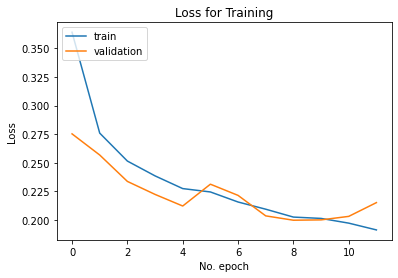

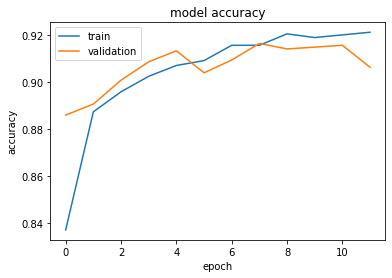

In [ ]:
plt.plot(history_RNv2_4.history['loss'], label='Loss (training data)')
plt.plot(history_RNv2_4.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_RNv2_4.history['accuracy'])
plt.plot(history_RNv2_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#preditions on test set
saved_model_RNv2_4.load_weights('./covid_classifier_model_RNv2_4.h5')
record_RNv2_4 = saved_model_RNv2_4.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.5098 - accuracy: 0.7825 - precision: 0.9124 - recall: 0.6250 - auc: 0.8938 - true_positives: 125.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 75.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_RNv2_4[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(125.0, 188.0, 12.0, 75.0)

In [ ]:
predict_RNv2_4 = saved_model_RNv2_4.predict(test_gen)
#predict

In [ ]:
y_pred_RNv2_4 = predict_RNv2_4 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_RNv2_4 = confusion_matrix(test_gen.classes, y_pred_RNv2_4)
print(mat_RNv2_4)

Confusion Matrix
[[160  40]
 [154  46]]


In [ ]:
conf_RNv2_4 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_RNv2_4

[[188.0, 12.0], [75.0, 125.0]]

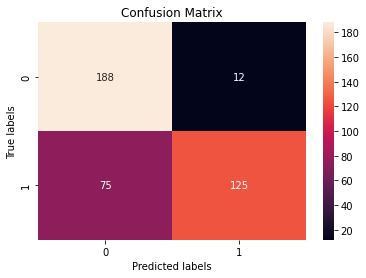

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_RNv2_4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

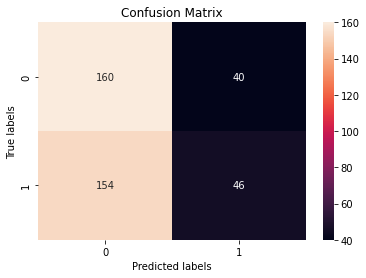

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_RNv2_4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_RNv2_4.load_weights("covid_classifier_model_RNv2_4.h5")
model_RNv2_4.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.5098 - accuracy: 0.7825 - precision: 0.9124 - recall: 0.6250 - auc: 0.8938 - true_positives: 125.0000 - true_negatives: 188.0000 - false_positives: 12.0000 - false_negatives: 75.0000


[0.5097585320472717,
 0.7825000286102295,
 0.9124087691307068,
 0.625,
 0.8938125371932983,
 125.0,
 188.0,
 12.0,
 75.0]

###VGG16

In [ ]:


base_model_vgg = VGG16(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


####Model 1


In [ ]:
#Model 1 128, 0.2, 0.001, ReLU, Adam
model_vgg = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg = model_vgg.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 318s 2s/step - loss: 0.3619 - accuracy: 0.8373 - precision: 0.8587 - recall: 0.8053 - auc: 0.9171 - true_positives: 4613.0000 - true_negatives: 5032.0000 - false_positives: 759.0000 - false_negatives: 1115.0000 - val_loss: 0.4243 - val_accuracy: 0.8906 - val_precision: 0.8547 - val_recall: 0.9539 - val_auc: 0.9659 - val_true_positives: 641.0000 - val_true_negatives: 499.0000 - val_false_positives: 109.0000 - val_false_negatives: 31.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 303s 2s/step - loss: 0.3075 - accuracy: 0.8709 - precision: 0.8837 - recall: 0.8527 - auc: 0.9407 - true_positives: 4884.0000 - true_negatives: 5148.0000 - false_positives: 643.0000 - false_negatives: 844.0000 - val_loss: 0.2679 - val_accuracy: 0.9016 - val_precision: 0.8957 - val_recall: 0.9196 - val_auc: 0.9702 - val_true_positives: 618.0000 - val_true_negatives: 536.0000 - val_false_positives: 72.0000 - val_false_negatives: 54.0000

In [ ]:
# load the saved model
saved_model_vgg = tf.keras.models.load_model('covid_classifier_model_vgg.h5')
saved_model_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8940880298614502 , Validation Accuracy:  0.918749988079071


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2723425328731537 
 Accuracy: 0.8859276175498962 
 Precision: 0.9303821921348572 
 Recall: 0.8329259753227234 
 AUC: 0.9566131234169006 
 True Positive: 4771.0 
 True Negative: 5434.0 
 False Positive: 357.0 
 False Negative: 957.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.19784709811210632 
 Accuracy: 0.918749988079071 
 Precision: 0.9226190447807312 
 Recall: 0.9226190447807312 
 AUC: 0.9757573008537292 
 True Positive: 620.0 
 True Negative: 556.0 
 False Positive: 52.0 
 False Negative: 52.0


In [ ]:
history_dict = history_vgg.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


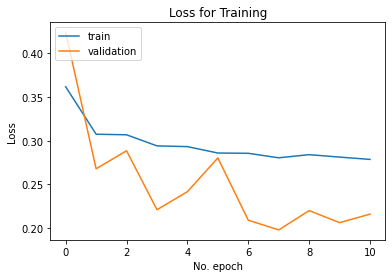

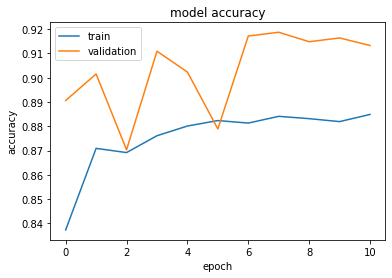

In [ ]:
plt.plot(history_vgg.history['loss'], label='Loss (training data)')
plt.plot(history_vgg.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg.load_weights('./covid_classifier_model_vgg.h5')
record_vgg = saved_model_vgg.evaluate(test_gen)

7/7 [==============================] - 24s 4s/step - loss: 0.3305 - accuracy: 0.8700 - precision: 0.9111 - recall: 0.8200 - auc: 0.9409 - true_positives: 164.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 36.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(164.0, 184.0, 16.0, 36.0)

In [ ]:
predict_vgg = saved_model_vgg.predict(test_gen)
#predict

In [ ]:
y_pred_vgg = predict_vgg > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg = confusion_matrix(test_gen.classes, y_pred_vgg)
print(mat_vgg)

Confusion Matrix
[[135  65]
 [139  61]]


In [ ]:
conf_vgg = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg

[[184.0, 16.0], [36.0, 164.0]]

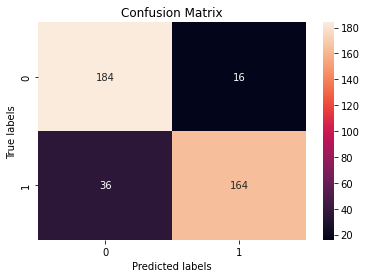

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

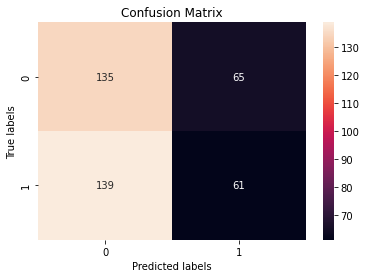

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_vgg, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg.load_weights("covid_classifier_model_vgg.h5")
model_vgg.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.3305 - accuracy: 0.8700 - precision: 0.9111 - recall: 0.8200 - auc: 0.9409 - true_positives: 164.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 36.0000


[0.33052071928977966,
 0.8700000047683716,
 0.9111111164093018,
 0.8199999928474426,
 0.9409250020980835,
 164.0,
 184.0,
 16.0,
 36.0]

#### Model 2 Best Results

In [ ]:
#Model 2 256, 0.2, 0.001, ReLU, Adam
model_vgg2 = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg2 = model_vgg2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 321s 2s/step - loss: 0.3336 - accuracy: 0.8538 - precision: 0.8724 - recall: 0.8270 - auc: 0.9303 - true_positives: 4737.0000 - true_negatives: 5098.0000 - false_positives: 693.0000 - false_negatives: 991.0000 - val_loss: 0.4970 - val_accuracy: 0.6531 - val_precision: 0.6023 - val_recall: 0.9985 - val_auc: 0.9694 - val_true_positives: 671.0000 - val_true_negatives: 165.0000 - val_false_positives: 443.0000 - val_false_negatives: 1.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 313s 2s/step - loss: 0.3103 - accuracy: 0.8710 - precision: 0.8802 - recall: 0.8572 - auc: 0.9400 - true_positives: 4910.0000 - true_negatives: 5123.0000 - false_positives: 668.0000 - false_negatives: 818.0000 - val_loss: 0.3270 - val_accuracy: 0.8484 - val_precision: 0.9878 - val_recall: 0.7202 - val_auc: 0.9654 - val_true_positives: 484.0000 - val_true_negatives: 602.0000 - val_false_positives: 6.0000 - val_false_negatives: 188.0000 -

In [ ]:
# load the saved model
saved_model_vgg2 = tf.keras.models.load_model('covid_classifier_model_vgg2.h5')
saved_model_vgg2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8868825435638428 , Validation Accuracy:  0.9195312261581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.279037207365036 
 Accuracy: 0.8830627799034119 
 Precision: 0.9195556640625 
 Recall: 0.838163435459137 
 AUC: 0.9526243209838867 
 True Positive: 4801.0 
 True Negative: 5371.0 
 False Positive: 420.0 
 False Negative: 927.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.21196356415748596 
 Accuracy: 0.9195312261581421 
 Precision: 0.9024045467376709 
 Recall: 0.949404776096344 
 AUC: 0.9752776026725769 
 True Positive: 638.0 
 True Negative: 539.0 
 False Positive: 69.0 
 False Negative: 34.0


In [ ]:
history_dict = history_vgg2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


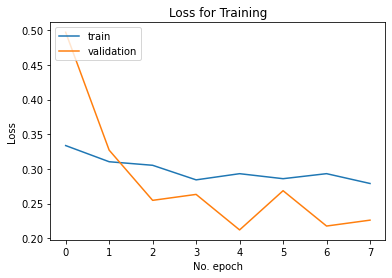

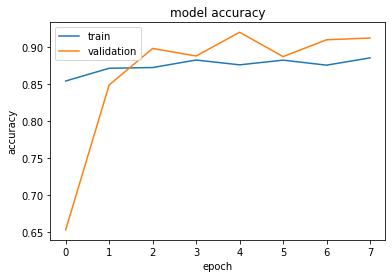

In [ ]:
plt.plot(history_vgg2.history['loss'], label='Loss (training data)')
plt.plot(history_vgg2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg2.history['accuracy'])
plt.plot(history_vgg2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg2.load_weights('./covid_classifier_model_vgg2.h5')
record_vgg2 = saved_model_vgg2.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.3103 - accuracy: 0.8775 - precision: 0.8683 - recall: 0.8900 - auc: 0.9429 - true_positives: 178.0000 - true_negatives: 173.0000 - false_positives: 27.0000 - false_negatives: 22.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(178.0, 173.0, 27.0, 22.0)

In [ ]:
predict_vgg2 = saved_model_vgg2.predict(test_gen)
#predict

In [ ]:
y_pred_vgg2 = predict_vgg2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg2 = confusion_matrix(test_gen.classes, y_pred_vgg2)
print(mat_vgg2)

Confusion Matrix
[[134  66]
 [120  80]]


In [ ]:
conf_vgg2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg2

[[173.0, 27.0], [22.0, 178.0]]

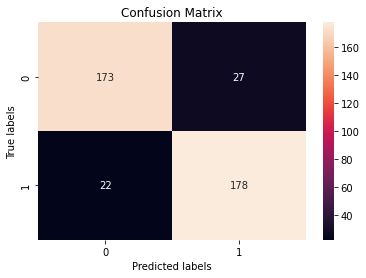

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

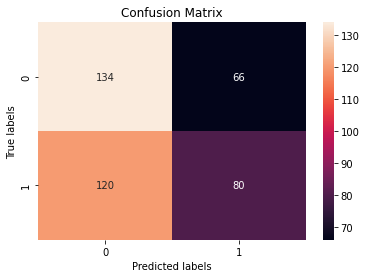

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_vgg2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg2.load_weights("covid_classifier_model_vgg2.h5")
model_vgg2.evaluate(test_gen)

7/7 [==============================] - 18s 2s/step - loss: 0.3103 - accuracy: 0.8775 - precision: 0.8683 - recall: 0.8900 - auc: 0.9429 - true_positives: 178.0000 - true_negatives: 173.0000 - false_positives: 27.0000 - false_negatives: 22.0000


[0.31025880575180054,
 0.8774999976158142,
 0.8682926893234253,
 0.8899999856948853,
 0.9429373741149902,
 178.0,
 173.0,
 27.0,
 22.0]

####Model 3

In [ ]:
#Model 3 256, 0.2, 0.0001, ReLU, Adam
model_vgg3 = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg3 = model_vgg3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 4013s 22s/step - loss: 0.4056 - accuracy: 0.8113 - precision: 0.8477 - recall: 0.7588 - auc: 0.8946 - true_positives: 4369.0000 - true_negatives: 4976.0000 - false_positives: 785.0000 - false_negatives: 1389.0000 - val_loss: 0.5056 - val_accuracy: 0.8641 - val_precision: 0.8535 - val_recall: 0.8801 - val_auc: 0.9380 - val_true_positives: 565.0000 - val_true_negatives: 541.0000 - val_false_positives: 97.0000 - val_false_negatives: 77.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 357s 2s/step - loss: 0.3356 - accuracy: 0.8523 - precision: 0.8752 - recall: 0.8218 - auc: 0.9299 - true_positives: 4732.0000 - true_negatives: 5086.0000 - false_positives: 675.0000 - false_negatives: 1026.0000 - val_loss: 0.3630 - val_accuracy: 0.8766 - val_precision: 0.8569 - val_recall: 0.9050 - val_auc: 0.9463 - val_true_positives: 581.0000 - val_true_negatives: 541.0000 - val_false_positives: 97.0000 - val_false_negatives: 6

In [ ]:
# load the saved model
saved_model_vgg3 = tf.keras.models.load_model('covid_classifier_model_vgg3.h5')
saved_model_vgg3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg3.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.895997941493988 , Validation Accuracy:  0.90234375


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2610805034637451 
 Accuracy: 0.8900077939033508 
 Precision: 0.9339130520820618 
 Recall: 0.8393539190292358 
 AUC: 0.9601615071296692 
 True Positive: 4833.0 
 True Negative: 5419.0 
 False Positive: 342.0 
 False Negative: 925.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.24665865302085876 
 Accuracy: 0.90234375 
 Precision: 0.9032761454582214 
 Recall: 0.9018691778182983 
 AUC: 0.9606367945671082 
 True Positive: 579.0 
 True Negative: 576.0 
 False Positive: 62.0 
 False Negative: 63.0


In [ ]:
history_dict = history_vgg3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


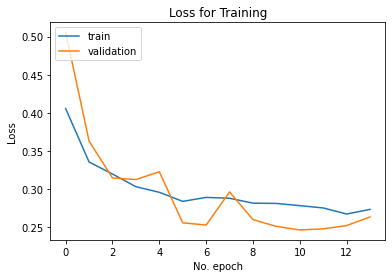

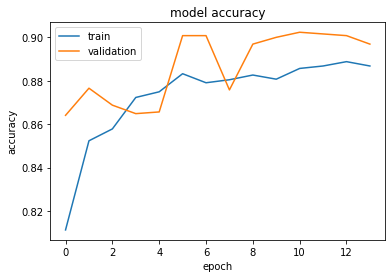

In [ ]:
plt.plot(history_vgg3.history['loss'], label='Loss (training data)')
plt.plot(history_vgg3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg3.history['accuracy'])
plt.plot(history_vgg3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg3.load_weights('./covid_classifier_model_vgg3.h5')
record_vgg3 = saved_model_vgg3.evaluate(test_gen)

7/7 [==============================] - 168s 27s/step - loss: 0.3888 - accuracy: 0.8400 - precision: 0.9048 - recall: 0.7600 - auc: 0.9270 - true_positives: 152.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 48.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(152.0, 184.0, 16.0, 48.0)

In [ ]:
predict_vgg3 = saved_model_vgg3.predict(test_gen)
#predict

In [ ]:


y_pred_vgg3 = predict_vgg3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg3 = confusion_matrix(test_gen.classes, y_pred_vgg3)
print(mat_vgg3)

Confusion Matrix
[[163  37]
 [156  44]]


In [ ]:
conf_vgg3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg3

[[184.0, 16.0], [48.0, 152.0]]

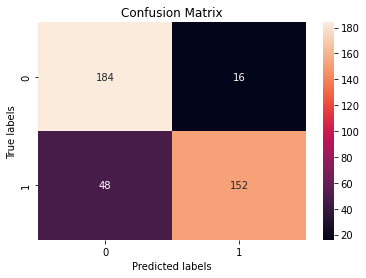

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

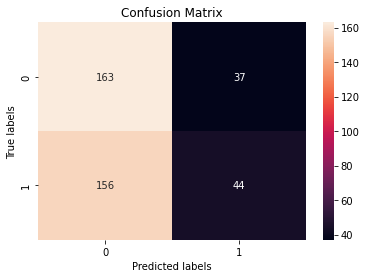

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_vgg3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg3.load_weights("covid_classifier_model_vgg3.h5")
model_vgg3.evaluate(test_gen)

7/7 [==============================] - 21s 3s/step - loss: 0.3888 - accuracy: 0.8400 - precision: 0.9048 - recall: 0.7600 - auc: 0.9270 - true_positives: 152.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 48.0000


[0.3887808322906494,
 0.8399999737739563,
 0.9047619104385376,
 0.7599999904632568,
 0.9270000457763672,
 152.0,
 184.0,
 16.0,
 48.0]

####Model 4

In [ ]:
#Model 4 256, 0.3, 0.001, ReLU, Adam
model_vgg4 = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg4.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg4 = model_vgg4.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 376s 2s/step - loss: 0.3401 - accuracy: 0.8517 - precision: 0.8690 - recall: 0.8282 - auc: 0.9278 - true_positives: 4769.0000 - true_negatives: 5042.0000 - false_positives: 719.0000 - false_negatives: 989.0000 - val_loss: 0.4469 - val_accuracy: 0.8141 - val_precision: 0.7422 - val_recall: 0.9642 - val_auc: 0.9547 - val_true_positives: 619.0000 - val_true_negatives: 423.0000 - val_false_positives: 215.0000 - val_false_negatives: 23.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 345s 2s/step - loss: 0.2997 - accuracy: 0.8720 - precision: 0.8847 - recall: 0.8555 - auc: 0.9440 - true_positives: 4926.0000 - true_negatives: 5119.0000 - false_positives: 642.0000 - false_negatives: 832.0000 - val_loss: 0.2829 - val_accuracy: 0.8984 - val_precision: 0.9224 - val_recall: 0.8707 - val_auc: 0.9579 - val_true_positives: 559.0000 - val_true_negatives: 591.0000 - val_false_positives: 47.0000 - val_false_negatives: 83.0000 

In [ ]:
# load the saved model
saved_model_vgg4 = tf.keras.models.load_model('covid_classifier_model_vgg4.h5')
saved_model_vgg4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg4.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg4.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8886188268661499 , Validation Accuracy:  0.909375011920929


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg4.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2703741490840912 
 Accuracy: 0.8913968205451965 
 Precision: 0.9390220046043396 
 Recall: 0.8370962142944336 
 AUC: 0.9583088159561157 
 True Positive: 4820.0 
 True Negative: 5448.0 
 False Positive: 313.0 
 False Negative: 938.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg4.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.23969972133636475 
 Accuracy: 0.909375011920929 
 Precision: 0.9009146094322205 
 Recall: 0.9205607771873474 
 AUC: 0.9643672704696655 
 True Positive: 591.0 
 True Negative: 573.0 
 False Positive: 65.0 
 False Negative: 51.0


In [ ]:
history_dict = history_vgg4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


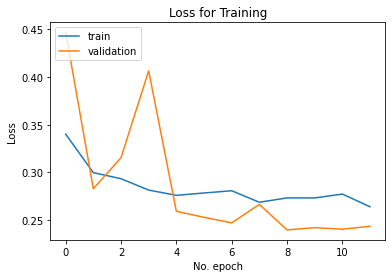

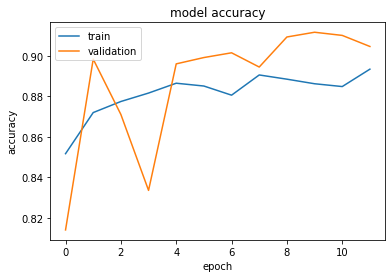

In [ ]:
plt.plot(history_vgg4.history['loss'], label='Loss (training data)')
plt.plot(history_vgg4.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg4.history['accuracy'])
plt.plot(history_vgg4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg4.load_weights('./covid_classifier_model_vgg4.h5')
record_vgg4 = saved_model_vgg4.evaluate(test_gen)

7/7 [==============================] - 45s 7s/step - loss: 0.3237 - accuracy: 0.8750 - precision: 0.8989 - recall: 0.8450 - auc: 0.9418 - true_positives: 169.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 31.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg4[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(169.0, 181.0, 19.0, 31.0)

In [ ]:
predict_vgg4 = saved_model_vgg4.predict(test_gen)
#predict

In [ ]:
y_pred_vgg4 = predict_vgg4 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg4 = confusion_matrix(test_gen.classes, y_pred_vgg4)
print(mat_vgg4)

Confusion Matrix
[[131  69]
 [146  54]]


In [ ]:
conf_vgg4 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg4

[[181.0, 19.0], [31.0, 169.0]]

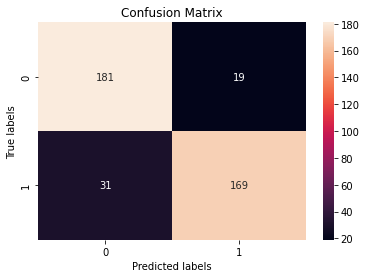

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

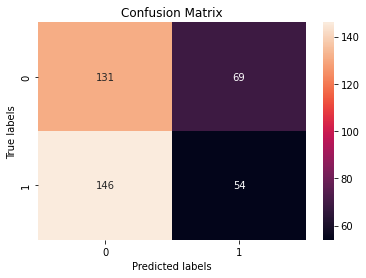

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_vgg4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg4.load_weights("covid_classifier_model_vgg4.h5")
model_vgg4.evaluate(test_gen)

7/7 [==============================] - 21s 3s/step - loss: 0.3237 - accuracy: 0.8750 - precision: 0.8989 - recall: 0.8450 - auc: 0.9418 - true_positives: 169.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 31.0000


[0.3237093687057495,
 0.875,
 0.8989361524581909,
 0.8450000286102295,
 0.9418125152587891,
 169.0,
 181.0,
 19.0,
 31.0]

####Model 5

In [ ]:
#Model 5 128, 0.3, 0.0001, ReLU, Adam
model_vgg5 = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg5.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg5.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg5 = model_vgg5.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 570s 3s/step - loss: 0.4916 - accuracy: 0.7524 - precision: 0.7724 - recall: 0.7155 - auc: 0.8376 - true_positives: 4120.0000 - true_negatives: 4547.0000 - false_positives: 1214.0000 - false_negatives: 1638.0000 - val_loss: 0.5210 - val_accuracy: 0.8141 - val_precision: 0.9353 - val_recall: 0.6760 - val_auc: 0.9231 - val_true_positives: 434.0000 - val_true_negatives: 608.0000 - val_false_positives: 30.0000 - val_false_negatives: 208.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 356s 2s/step - loss: 0.3736 - accuracy: 0.8304 - precision: 0.8547 - recall: 0.7959 - auc: 0.9120 - true_positives: 4583.0000 - true_negatives: 4982.0000 - false_positives: 779.0000 - false_negatives: 1175.0000 - val_loss: 0.3729 - val_accuracy: 0.8539 - val_precision: 0.8605 - val_recall: 0.8458 - val_auc: 0.9349 - val_true_positives: 543.0000 - val_true_negatives: 550.0000 - val_false_positives: 88.0000 - val_false_negatives: 9

In [ ]:
# load the saved model
saved_model_vgg5 = tf.keras.models.load_model('covid_classifier_model_vgg5.h5')
saved_model_vgg5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg5.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg5.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.886101245880127 , Validation Accuracy:  0.8999999761581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg5.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.27681663632392883 
 Accuracy: 0.8869693279266357 
 Precision: 0.9276391267776489 
 Recall: 0.8393539190292358 
 AUC: 0.9550520181655884 
 True Positive: 4833.0 
 True Negative: 5384.0 
 False Positive: 377.0 
 False Negative: 925.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg5.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.25772130489349365 
 Accuracy: 0.8999999761581421 
 Precision: 0.8953846096992493 
 Recall: 0.9065420627593994 
 AUC: 0.9585713744163513 
 True Positive: 582.0 
 True Negative: 570.0 
 False Positive: 68.0 
 False Negative: 60.0


In [ ]:
history_dict = history_vgg5.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


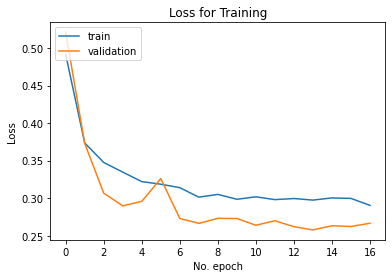

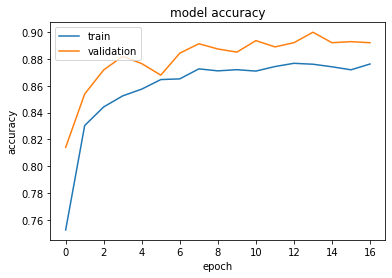

In [ ]:
plt.plot(history_vgg5.history['loss'], label='Loss (training data)')
plt.plot(history_vgg5.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg5.history['accuracy'])
plt.plot(history_vgg5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg5.load_weights('./covid_classifier_model_vgg5.h5')
record_vgg5 = saved_model_vgg5.evaluate(test_gen)

7/7 [==============================] - 25s 3s/step - loss: 0.3761 - accuracy: 0.8500 - precision: 0.9070 - recall: 0.7800 - auc: 0.9250 - true_positives: 156.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 44.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg5[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(156.0, 184.0, 16.0, 44.0)

In [ ]:
predict_vgg5 = saved_model_vgg5.predict(test_gen)
#predict

In [ ]:
y_pred_vgg5 = predict_vgg5 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg5 = confusion_matrix(test_gen.classes, y_pred_vgg5)
print(mat_vgg5)

Confusion Matrix
[[146  54]
 [152  48]]


In [ ]:
conf_vgg5 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg5

[[184.0, 16.0], [44.0, 156.0]]

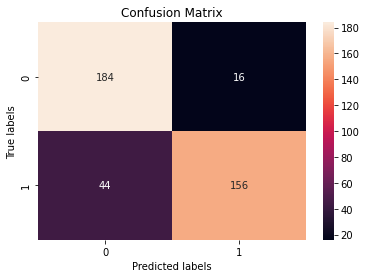

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

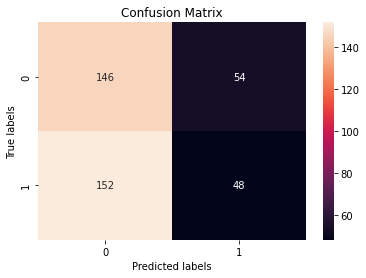

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_vgg5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg5.load_weights("covid_classifier_model_vgg5.h5")
model_vgg5.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.3761 - accuracy: 0.8500 - precision: 0.9070 - recall: 0.7800 - auc: 0.9250 - true_positives: 156.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 44.0000


[0.3761104345321655,
 0.8500000238418579,
 0.9069767594337463,
 0.7799999713897705,
 0.9250250458717346,
 156.0,
 184.0,
 16.0,
 44.0]

####Model 6 IGNORED

In [ ]:
#Model 6 256, 0.3, 0.0001, ReLU, Adam
model_vgg6 = tf.keras.Sequential([
    base_model_vgg, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg6.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_vgg6.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_vgg6 = model_vgg6.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 570s 3s/step - loss: 0.4916 - accuracy: 0.7524 - precision: 0.7724 - recall: 0.7155 - auc: 0.8376 - true_positives: 4120.0000 - true_negatives: 4547.0000 - false_positives: 1214.0000 - false_negatives: 1638.0000 - val_loss: 0.5210 - val_accuracy: 0.8141 - val_precision: 0.9353 - val_recall: 0.6760 - val_auc: 0.9231 - val_true_positives: 434.0000 - val_true_negatives: 608.0000 - val_false_positives: 30.0000 - val_false_negatives: 208.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 356s 2s/step - loss: 0.3736 - accuracy: 0.8304 - precision: 0.8547 - recall: 0.7959 - auc: 0.9120 - true_positives: 4583.0000 - true_negatives: 4982.0000 - false_positives: 779.0000 - false_negatives: 1175.0000 - val_loss: 0.3729 - val_accuracy: 0.8539 - val_precision: 0.8605 - val_recall: 0.8458 - val_auc: 0.9349 - val_true_positives: 543.0000 - val_true_negatives: 550.0000 - val_false_positives: 88.0000 - val_false_negatives: 9

In [ ]:
# load the saved model
saved_model_vgg6 = tf.keras.models.load_model('covid_classifier_model_vgg6.h5')
saved_model_vgg6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
# evaluate the accuracy
_,train_acc,_,_,_,_,_,_,_ = saved_model_vgg6.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_vgg6.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.886101245880127 , Validation Accuracy:  0.8999999761581421


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_vgg6.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.27681663632392883 
 Accuracy: 0.8869693279266357 
 Precision: 0.9276391267776489 
 Recall: 0.8393539190292358 
 AUC: 0.9550520181655884 
 True Positive: 4833.0 
 True Negative: 5384.0 
 False Positive: 377.0 
 False Negative: 925.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_vgg6.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.25772130489349365 
 Accuracy: 0.8999999761581421 
 Precision: 0.8953846096992493 
 Recall: 0.9065420627593994 
 AUC: 0.9585713744163513 
 True Positive: 582.0 
 True Negative: 570.0 
 False Positive: 68.0 
 False Negative: 60.0


In [ ]:
history_dict = history_vgg6.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


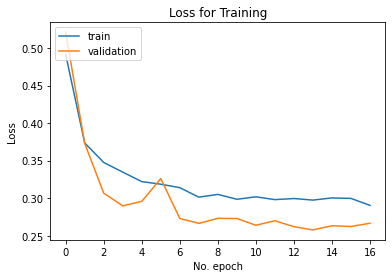

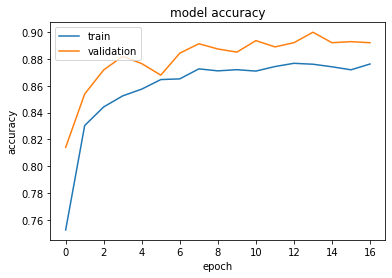

In [ ]:
plt.plot(history_vgg6.history['loss'], label='Loss (training data)')
plt.plot(history_vgg6.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_vgg6.history['accuracy'])
plt.plot(history_vgg6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#prediction on test set
saved_model_vgg6.load_weights('./covid_classifier_model_vgg6.h5')
record_vgg6 = saved_model_vgg6.evaluate(test_gen)

7/7 [==============================] - 25s 3s/step - loss: 0.3761 - accuracy: 0.8500 - precision: 0.9070 - recall: 0.7800 - auc: 0.9250 - true_positives: 156.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 44.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_vgg6[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(156.0, 184.0, 16.0, 44.0)

In [ ]:
predict_vgg6 = saved_model_vgg6.predict(test_gen)
#predict

In [ ]:
y_pred_vgg6 = predict_vgg6 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_vgg6 = confusion_matrix(test_gen.classes, y_pred_vgg6)
print(mat_vgg6)

Confusion Matrix
[[146  54]
 [152  48]]


In [ ]:
conf_vgg6 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_vgg6

[[184.0, 16.0], [44.0, 156.0]]

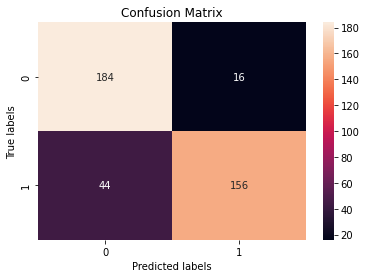

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_vgg6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

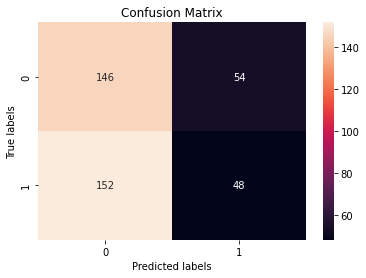

In [ ]:
ax= plt.subplot()
sns.heatmap(mat_vgg6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_vgg6.load_weights("covid_classifier_model_vgg6.h5")
model_vgg6.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.3761 - accuracy: 0.8500 - precision: 0.9070 - recall: 0.7800 - auc: 0.9250 - true_positives: 156.0000 - true_negatives: 184.0000 - false_positives: 16.0000 - false_negatives: 44.0000


[0.3761104345321655,
 0.8500000238418579,
 0.9069767594337463,
 0.7799999713897705,
 0.9250250458717346,
 156.0,
 184.0,
 16.0,
 44.0]

###DenseNet121

In [ ]:

base_model_dn = DenseNet121(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_dn.layers:
    layer.trainable = False

29097984/29084464 [==============================] - 0s 0us/step


####Model 1

Train  0.906

Val  0.911

Test 0.825

In [ ]:

model_dn = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn = model_dn.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 349s 2s/step - loss: 0.2845 - accuracy: 0.8804 - precision: 0.8928 - recall: 0.8643 - auc: 0.9500 - true_positives: 4973.0000 - true_negatives: 5169.0000 - false_positives: 597.0000 - false_negatives: 781.0000 - val_loss: 0.3989 - val_accuracy: 0.8383 - val_precision: 0.7693 - val_recall: 0.9706 - val_auc: 0.9664 - val_true_positives: 627.0000 - val_true_negatives: 446.0000 - val_false_positives: 188.0000 - val_false_negatives: 19.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 342s 2s/step - loss: 0.2363 - accuracy: 0.9035 - precision: 0.9137 - recall: 0.8909 - auc: 0.9649 - true_positives: 5126.0000 - true_negatives: 5282.0000 - false_positives: 484.0000 - false_negatives: 628.0000 - val_loss: 0.4311 - val_accuracy: 0.8227 - val_precision: 0.7479 - val_recall: 0.9783 - val_auc: 0.9690 - val_true_positives: 632.0000 - val_true_negatives: 421.0000 - val_false_positives: 213.0000 - val_false_negatives: 14.0000

In [ ]:
# load the saved model
saved_model_dn = tf.keras.models.load_model('covid_classifier_model_dn.h5')
saved_model_dn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               131200    
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9067708253860474 , Validation Accuracy:  0.9117187261581421


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.23346206545829773 
 Accuracy: 0.909375011920929 
 Precision: 0.9648637771606445 
 Recall: 0.8494960069656372 
 AUC: 0.9726875424385071 
 True Positive: 4888.0 
 True Negative: 5588.0 
 False Positive: 178.0 
 False Negative: 866.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.207942932844162 
 Accuracy: 0.9117187261581421 
 Precision: 0.91190105676651 
 Recall: 0.9133126735687256 
 AUC: 0.9733265042304993 
 True Positive: 590.0 
 True Negative: 577.0 
 False Positive: 57.0 
 False Negative: 56.0


In [ ]:
history_dict = history_vgg4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


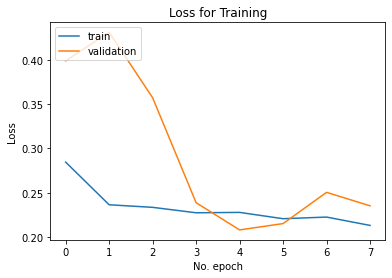

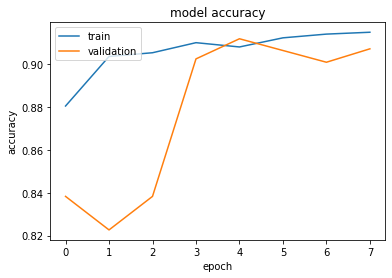

In [ ]:
plt.plot(history_dn.history['loss'], label='Loss (training data)')
plt.plot(history_dn.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn.history['accuracy'])
plt.plot(history_dn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn.load_weights('./covid_classifier_model_dn.h5')
record_dn = saved_model_dn.evaluate(test_gen)

7/7 [==============================] - 24s 4s/step - loss: 0.3414 - accuracy: 0.8250 - precision: 0.9062 - recall: 0.7250 - auc: 0.9471 - true_positives: 145.0000 - true_negatives: 185.0000 - false_positives: 15.0000 - false_negatives: 55.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(145.0, 185.0, 15.0, 55.0)

In [ ]:
predict_dn = saved_model_dn.predict(test_gen)
#predict

In [ ]:


y_pred_dn = predict_dn > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn = confusion_matrix(test_gen.classes, y_pred_dn)
print(mat_dn)

Confusion Matrix
[[146  54]
 [143  57]]


In [ ]:
conf_dn = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn

[[185.0, 15.0], [55.0, 145.0]]

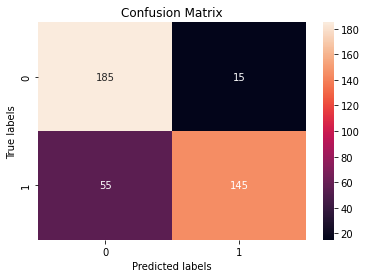

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

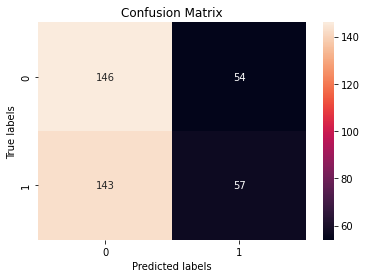

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn.load_weights("covid_classifier_model_dn.h5")
model_dn.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.3414 - accuracy: 0.8250 - precision: 0.9062 - recall: 0.7250 - auc: 0.9471 - true_positives: 145.0000 - true_negatives: 185.0000 - false_positives: 15.0000 - false_negatives: 55.0000


[0.3413963317871094,
 0.824999988079071,
 0.90625,
 0.7250000238418579,
 0.9470750093460083,
 145.0,
 185.0,
 15.0,
 55.0]

####Model 2

Train 0.919

Val 0.907

Test 0.84

In [ ]:

model_dn2 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn2 = model_dn2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 333s 2s/step - loss: 0.2923 - accuracy: 0.8770 - precision: 0.8873 - recall: 0.8634 - auc: 0.9485 - true_positives: 4968.0000 - true_negatives: 5135.0000 - false_positives: 631.0000 - false_negatives: 786.0000 - val_loss: 0.3067 - val_accuracy: 0.8813 - val_precision: 0.8374 - val_recall: 0.9489 - val_auc: 0.9674 - val_true_positives: 613.0000 - val_true_negatives: 515.0000 - val_false_positives: 119.0000 - val_false_negatives: 33.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 296s 2s/step - loss: 0.2442 - accuracy: 0.9005 - precision: 0.9123 - recall: 0.8860 - auc: 0.9625 - true_positives: 5098.0000 - true_negatives: 5276.0000 - false_positives: 490.0000 - false_negatives: 656.0000 - val_loss: 0.4538 - val_accuracy: 0.8180 - val_precision: 0.7415 - val_recall: 0.9814 - val_auc: 0.9685 - val_true_positives: 634.0000 - val_true_negatives: 413.0000 - val_false_positives: 221.0000 - val_false_negatives: 12.0000

In [ ]:
# load the saved model
saved_model_dn2 = tf.keras.models.load_model('covid_classifier_model_dn2.h5')
saved_model_dn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_5   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 256)               262400    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9191840291023254 , Validation Accuracy:  0.907031238079071


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.19873683154582977 
 Accuracy: 0.9213541746139526 
 Precision: 0.950222909450531 
 Recall: 0.8891206383705139 
 AUC: 0.976084291934967 
 True Positive: 5116.0 
 True Negative: 5498.0 
 False Positive: 268.0 
 False Negative: 638.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.22155630588531494 
 Accuracy: 0.907031238079071 
 Precision: 0.8835516571998596 
 Recall: 0.9396284818649292 
 AUC: 0.9756789803504944 
 True Positive: 607.0 
 True Negative: 554.0 
 False Positive: 80.0 
 False Negative: 39.0


In [ ]:
history_dict = history_dn2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


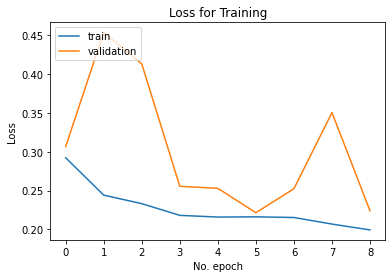

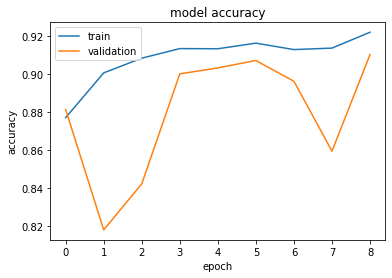

In [ ]:
plt.plot(history_dn2.history['loss'], label='Loss (training data)')
plt.plot(history_dn2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn2.history['accuracy'])
plt.plot(history_dn2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn2.load_weights('./covid_classifier_model_dn2.h5')
record_dn2 = saved_model_dn2.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.3281 - accuracy: 0.8400 - precision: 0.8908 - recall: 0.7750 - auc: 0.9415 - true_positives: 155.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 45.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(155.0, 181.0, 19.0, 45.0)

In [ ]:
predict_dn2 = saved_model_dn2.predict(test_gen)
#predict

In [ ]:


y_pred_dn2 = predict_dn2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn2 = confusion_matrix(test_gen.classes, y_pred_dn2)
print(mat_dn2)

Confusion Matrix
[[125  75]
 [130  70]]


In [ ]:
conf_dn2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn2

[[181.0, 19.0], [45.0, 155.0]]

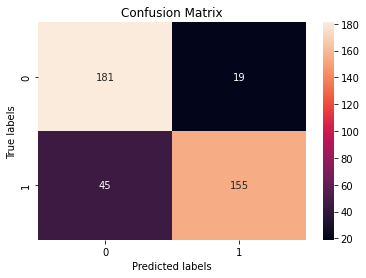

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

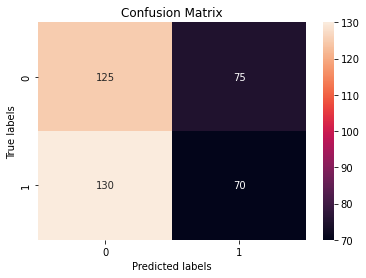

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn2.load_weights("covid_classifier_model_dn2.h5")
model_dn2.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.3281 - accuracy: 0.8400 - precision: 0.8908 - recall: 0.7750 - auc: 0.9415 - true_positives: 155.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 45.0000


[0.32809656858444214,
 0.8399999737739563,
 0.8908045887947083,
 0.7749999761581421,
 0.9414500594139099,
 155.0,
 181.0,
 19.0,
 45.0]

####Model 3

Train 0.907

Val 0.911

Test 0.805

In [ ]:

model_dn3 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn3 = model_dn3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 314s 2s/step - loss: 0.3947 - accuracy: 0.8189 - precision: 0.8335 - recall: 0.7967 - auc: 0.9028 - true_positives: 4584.0000 - true_negatives: 4850.0000 - false_positives: 916.0000 - false_negatives: 1170.0000 - val_loss: 0.3668 - val_accuracy: 0.8414 - val_precision: 0.7829 - val_recall: 0.9489 - val_auc: 0.9513 - val_true_positives: 613.0000 - val_true_negatives: 464.0000 - val_false_positives: 170.0000 - val_false_negatives: 33.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 297s 2s/step - loss: 0.3003 - accuracy: 0.8738 - precision: 0.8885 - recall: 0.8545 - auc: 0.9441 - true_positives: 4917.0000 - true_negatives: 5149.0000 - false_positives: 617.0000 - false_negatives: 837.0000 - val_loss: 0.2821 - val_accuracy: 0.8781 - val_precision: 0.8441 - val_recall: 0.9303 - val_auc: 0.9605 - val_true_positives: 601.0000 - val_true_negatives: 523.0000 - val_false_positives: 111.0000 - val_false_negatives: 45

In [ ]:
# load the saved model
saved_model_dn3 = tf.keras.models.load_model('covid_classifier_model_dn3.h5')
saved_model_dn3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_7   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn3.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9078993201255798 , Validation Accuracy:  0.9117187261581421


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.23721066117286682 
 Accuracy: 0.9032118320465088 
 Precision: 0.9454580545425415 
 Recall: 0.8555787205696106 
 AUC: 0.9680830836296082 
 True Positive: 4923.0 
 True Negative: 5482.0 
 False Positive: 284.0 
 False Negative: 831.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.22166219353675842 
 Accuracy: 0.9117187261581421 
 Precision: 0.9093701839447021 
 Recall: 0.9164086580276489 
 AUC: 0.9705002903938293 
 True Positive: 592.0 
 True Negative: 575.0 
 False Positive: 59.0 
 False Negative: 54.0


In [ ]:
history_dict = history_dn3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


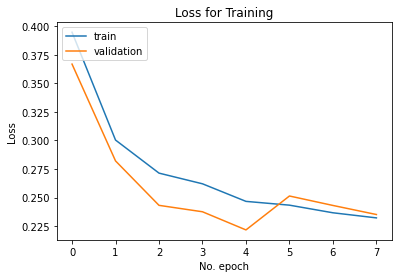

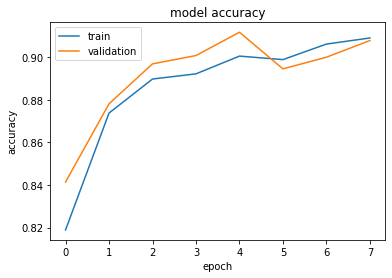

In [ ]:
plt.plot(history_dn3.history['loss'], label='Loss (training data)')
plt.plot(history_dn3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn3.history['accuracy'])
plt.plot(history_dn3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn3.load_weights('./covid_classifier_model_dn3.h5')
record_dn3 = saved_model_dn3.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.4026 - accuracy: 0.8050 - precision: 0.8813 - recall: 0.7050 - auc: 0.9231 - true_positives: 141.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 59.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(141.0, 181.0, 19.0, 59.0)

In [ ]:
predict_dn3 = saved_model_dn3.predict(test_gen)
#predict

In [ ]:


y_pred_dn3 = predict_dn3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn3 = confusion_matrix(test_gen.classes, y_pred_dn3)
print(mat_dn3)

Confusion Matrix
[[146  54]
 [152  48]]


In [ ]:
conf_dn3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn3

[[181.0, 19.0], [59.0, 141.0]]

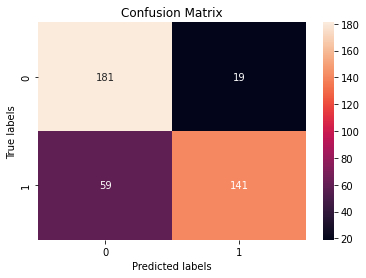

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

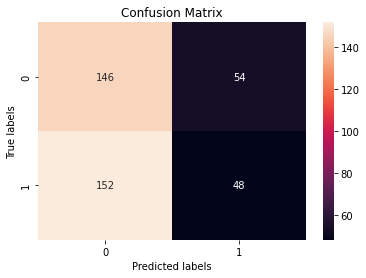

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn3.load_weights("covid_classifier_model_dn3.h5")
model_dn3.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.4026 - accuracy: 0.8050 - precision: 0.8813 - recall: 0.7050 - auc: 0.9231 - true_positives: 141.0000 - true_negatives: 181.0000 - false_positives: 19.0000 - false_negatives: 59.0000


[0.4026349186897278,
 0.8050000071525574,
 0.8812500238418579,
 0.7049999833106995,
 0.9231374859809875,
 141.0,
 181.0,
 19.0,
 59.0]

####Model 4 Best Results

Train 0.889

Val 0.910

Test 0.87

In [ ]:

model_dn4 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn4.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn4 = model_dn4.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 392s 2s/step - loss: 0.2617 - accuracy: 0.8944 - precision: 0.9063 - recall: 0.8794 - auc: 0.9576 - true_positives: 5060.0000 - true_negatives: 5243.0000 - false_positives: 523.0000 - false_negatives: 694.0000 - val_loss: 0.3498 - val_accuracy: 0.8523 - val_precision: 0.7860 - val_recall: 0.9721 - val_auc: 0.9718 - val_true_positives: 628.0000 - val_true_negatives: 463.0000 - val_false_positives: 171.0000 - val_false_negatives: 18.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 295s 2s/step - loss: 0.2389 - accuracy: 0.9047 - precision: 0.9113 - recall: 0.8964 - auc: 0.9643 - true_positives: 5158.0000 - true_negatives: 5264.0000 - false_positives: 502.0000 - false_negatives: 596.0000 - val_loss: 0.3834 - val_accuracy: 0.8500 - val_precision: 0.7809 - val_recall: 0.9768 - val_auc: 0.9685 - val_true_positives: 631.0000 - val_true_negatives: 457.0000 - val_false_positives: 177.0000 - val_false_negatives: 15.0000

In [ ]:
# load the saved model
saved_model_dn4 = tf.keras.models.load_model('covid_classifier_model_dn4.h5')
saved_model_dn4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_8   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn4.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn4.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8896701335906982 , Validation Accuracy:  0.910937488079071


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn4.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.27914559841156006 
 Accuracy: 0.886631965637207 
 Precision: 0.974200427532196 
 Recall: 0.7940562963485718 
 AUC: 0.9703929424285889 
 True Positive: 4569.0 
 True Negative: 5645.0 
 False Positive: 121.0 
 False Negative: 1185.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn4.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.2040501832962036 
 Accuracy: 0.910937488079071 
 Precision: 0.9054877758026123 
 Recall: 0.9195046424865723 
 AUC: 0.9742690324783325 
 True Positive: 594.0 
 True Negative: 572.0 
 False Positive: 62.0 
 False Negative: 52.0


In [ ]:
history_dict = history_dn4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


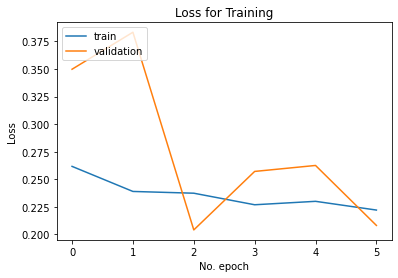

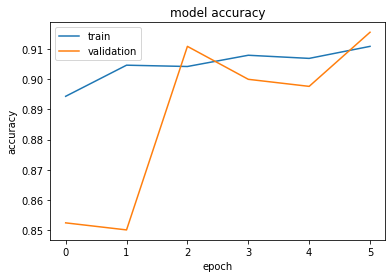

In [ ]:
plt.plot(history_dn4.history['loss'], label='Loss (training data)')
plt.plot(history_dn4.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn4.history['accuracy'])
plt.plot(history_dn4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn4.load_weights('./covid_classifier_model_dn4.h5')
record_dn4 = saved_model_dn4.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.2841 - accuracy: 0.8700 - precision: 0.9205 - recall: 0.8100 - auc: 0.9588 - true_positives: 162.0000 - true_negatives: 186.0000 - false_positives: 14.0000 - false_negatives: 38.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn4[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(162.0, 186.0, 14.0, 38.0)

In [ ]:
predict_dn4 = saved_model_dn4.predict(test_gen)
#predict

In [ ]:


y_pred_dn4 = predict_dn4 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn4 = confusion_matrix(test_gen.classes, y_pred_dn4)
print(mat_dn4)

Confusion Matrix
[[141  59]
 [134  66]]


In [ ]:
conf_dn4 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn4

[[186.0, 14.0], [38.0, 162.0]]

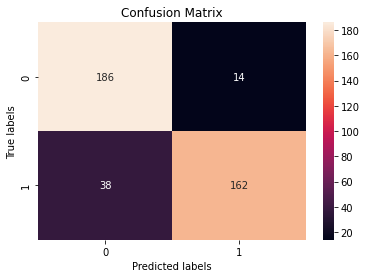

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

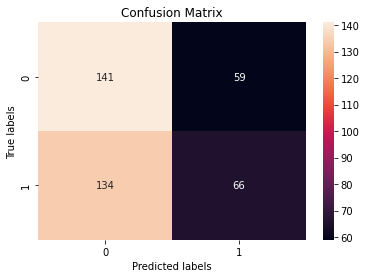

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn4.load_weights("covid_classifier_model_dn4.h5")
model_dn4.evaluate(test_gen)

7/7 [==============================] - 29s 4s/step - loss: 0.2841 - accuracy: 0.8700 - precision: 0.9205 - recall: 0.8100 - auc: 0.9588 - true_positives: 162.0000 - true_negatives: 186.0000 - false_positives: 14.0000 - false_negatives: 38.0000


[0.2841300368309021,
 0.8700000047683716,
 0.9204545617103577,
 0.8100000023841858,
 0.9588375091552734,
 162.0,
 186.0,
 14.0,
 38.0]

####Model 5

Train 0.909

Val 0.917

Test 0.785

In [ ]:

model_dn5 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn5.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn5.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn5 = model_dn5.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 335s 2s/step - loss: 0.2875 - accuracy: 0.8780 - precision: 0.8870 - recall: 0.8662 - auc: 0.9491 - true_positives: 4984.0000 - true_negatives: 5131.0000 - false_positives: 635.0000 - false_negatives: 770.0000 - val_loss: 0.3706 - val_accuracy: 0.8594 - val_precision: 0.7995 - val_recall: 0.9628 - val_auc: 0.9662 - val_true_positives: 622.0000 - val_true_negatives: 478.0000 - val_false_positives: 156.0000 - val_false_negatives: 24.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 304s 2s/step - loss: 0.2333 - accuracy: 0.9059 - precision: 0.9215 - recall: 0.8872 - auc: 0.9654 - true_positives: 5105.0000 - true_negatives: 5331.0000 - false_positives: 435.0000 - false_negatives: 649.0000 - val_loss: 0.2044 - val_accuracy: 0.9172 - val_precision: 0.9383 - val_recall: 0.8947 - val_auc: 0.9738 - val_true_positives: 578.0000 - val_true_negatives: 596.0000 - val_false_positives: 38.0000 - val_false_negatives: 68.0000 

In [ ]:
# load the saved model
saved_model_dn5 = tf.keras.models.load_model('covid_classifier_model_dn5.h5')
saved_model_dn5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_9   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 256)               262400    
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)              

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn5.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn5.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9096354246139526 , Validation Accuracy:  0.917187511920929


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn5.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.2226564586162567 
 Accuracy: 0.9077256917953491 
 Precision: 0.9534119367599487 
 Recall: 0.8571428656578064 
 AUC: 0.9709943532943726 
 True Positive: 4932.0 
 True Negative: 5525.0 
 False Positive: 241.0 
 False Negative: 822.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn5.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.20435604453086853 
 Accuracy: 0.917187511920929 
 Precision: 0.9383116960525513 
 Recall: 0.8947368264198303 
 AUC: 0.973751425743103 
 True Positive: 578.0 
 True Negative: 596.0 
 False Positive: 38.0 
 False Negative: 68.0


In [ ]:
history_dict = history_dn5.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


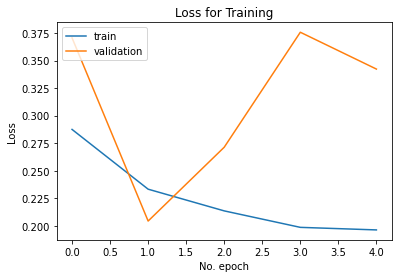

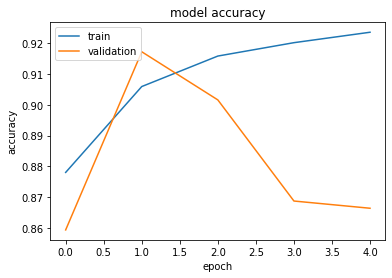

In [ ]:
plt.plot(history_dn5.history['loss'], label='Loss (training data)')
plt.plot(history_dn5.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn5.history['accuracy'])
plt.plot(history_dn5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn5.load_weights('./covid_classifier_model_dn5.h5')
record_dn5 = saved_model_dn5.evaluate(test_gen)

7/7 [==============================] - 23s 3s/step - loss: 0.4622 - accuracy: 0.7850 - precision: 0.9318 - recall: 0.6150 - auc: 0.9189 - true_positives: 123.0000 - true_negatives: 191.0000 - false_positives: 9.0000 - false_negatives: 77.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn5[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(123.0, 191.0, 9.0, 77.0)

In [ ]:
predict_dn5 = saved_model_dn5.predict(test_gen)
#predict

In [ ]:


y_pred_dn5 = predict_dn5 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn5 = confusion_matrix(test_gen.classes, y_pred_dn5)
print(mat_dn5)

Confusion Matrix
[[147  53]
 [154  46]]


In [ ]:
conf_dn5 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn5

[[191.0, 9.0], [77.0, 123.0]]

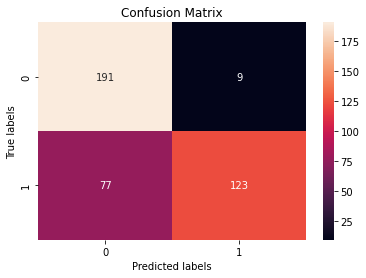

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

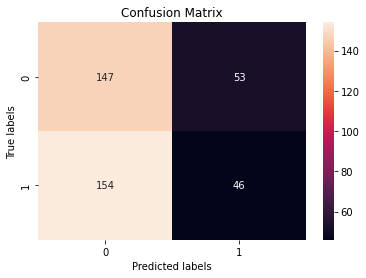

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn5, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn5.load_weights("covid_classifier_model_dn5.h5")
model_dn5.evaluate(test_gen)

7/7 [==============================] - 21s 3s/step - loss: 0.4622 - accuracy: 0.7850 - precision: 0.9318 - recall: 0.6150 - auc: 0.9189 - true_positives: 123.0000 - true_negatives: 191.0000 - false_positives: 9.0000 - false_negatives: 77.0000


[0.46224740147590637,
 0.7850000262260437,
 0.9318181872367859,
 0.6150000095367432,
 0.9189125299453735,
 123.0,
 191.0,
 9.0,
 77.0]

####Model 6

train- 0.899

val- 0.910

test- 0.857

In [ ]:

model_dn7 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn7.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn7.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn7 = model_dn7.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 5822s 32s/step - loss: 0.2898 - accuracy: 0.8807 - precision: 0.8898 - recall: 0.8678 - auc: 0.9487 - true_positives: 4975.0000 - true_negatives: 5170.0000 - false_positives: 616.0000 - false_negatives: 758.0000 - val_loss: 0.2222 - val_accuracy: 0.9102 - val_precision: 0.9057 - val_recall: 0.9234 - val_auc: 0.9708 - val_true_positives: 615.0000 - val_true_negatives: 550.0000 - val_false_positives: 64.0000 - val_false_negatives: 51.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 301s 2s/step - loss: 0.2606 - accuracy: 0.8986 - precision: 0.9064 - recall: 0.8880 - auc: 0.9577 - true_positives: 5091.0000 - true_negatives: 5260.0000 - false_positives: 526.0000 - false_negatives: 642.0000 - val_loss: 0.2345 - val_accuracy: 0.9070 - val_precision: 0.8890 - val_recall: 0.9384 - val_auc: 0.9695 - val_true_positives: 625.0000 - val_true_negatives: 536.0000 - val_false_positives: 78.0000 - val_false_negatives: 41.0000

In [ ]:
# load the saved model
saved_model_dn7 = tf.keras.models.load_model('covid_classifier_model_dn7.h5')
saved_model_dn7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn7.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn7.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9012066721916199 , Validation Accuracy:  0.91015625


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn7.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.24928836524486542 
 Accuracy: 0.8990363478660583 
 Precision: 0.946987509727478 
 Recall: 0.8444095849990845 
 AUC: 0.9655253291130066 
 True Positive: 4841.0 
 True Negative: 5515.0 
 False Positive: 271.0 
 False Negative: 892.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn7.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.2222316712141037 
 Accuracy: 0.91015625 
 Precision: 0.9057437181472778 
 Recall: 0.9234234094619751 
 AUC: 0.9708124399185181 
 True Positive: 615.0 
 True Negative: 550.0 
 False Positive: 64.0 
 False Negative: 51.0


In [ ]:
history_dict = history_dn7.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


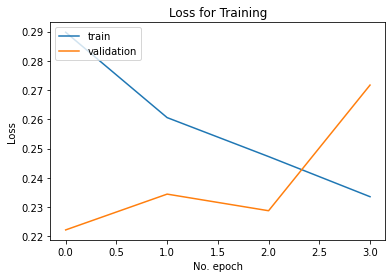

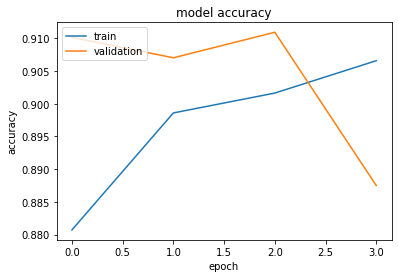

In [ ]:
plt.plot(history_dn7.history['loss'], label='Loss (training data)')
plt.plot(history_dn7.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn7.history['accuracy'])
plt.plot(history_dn7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn7.load_weights('./covid_classifier_model_dn7.h5')
record_dn7 = saved_model_dn7.evaluate(test_gen)

7/7 [==============================] - 247s 41s/step - loss: 0.3178 - accuracy: 0.8575 - precision: 0.8994 - recall: 0.8050 - auc: 0.9428 - true_positives: 161.0000 - true_negatives: 182.0000 - false_positives: 18.0000 - false_negatives: 39.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn7[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(161.0, 182.0, 18.0, 39.0)

In [ ]:
predict_dn7 = saved_model_dn7.predict(test_gen)
#predict

In [ ]:


y_pred_dn7 = predict_dn7 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn7 = confusion_matrix(test_gen.classes, y_pred_dn7)
print(mat_dn7)

Confusion Matrix
[[129  71]
 [139  61]]


In [ ]:
conf_dn7 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn7

[[182.0, 18.0], [39.0, 161.0]]

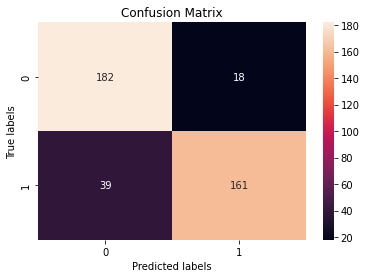

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn7, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

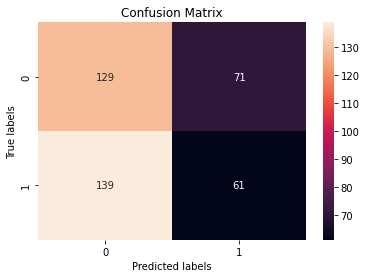

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn7, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn7.load_weights("covid_classifier_model_dn7   .h5")
model_dn7.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.3178 - accuracy: 0.8575 - precision: 0.8994 - recall: 0.8050 - auc: 0.9428 - true_positives: 161.0000 - true_negatives: 182.0000 - false_positives: 18.0000 - false_negatives: 39.0000


[0.3177622854709625,
 0.8575000166893005,
 0.8994413614273071,
 0.8050000071525574,
 0.9427624344825745,
 161.0,
 182.0,
 18.0,
 39.0]

####Model 7 (IGNORED AS LOW RESULTS)

train- 0.899

val- 0.891

test- 0.787

In [ ]:

model_dn6 = tf.keras.Sequential([
    base_model_dn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_dn6.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_dn6.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_dn6 = model_dn6.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 390s 2s/step - loss: 0.2800 - accuracy: 0.8818 - precision: 0.8973 - recall: 0.8620 - auc: 0.9506 - true_positives: 4960.0000 - true_negatives: 5198.0000 - false_positives: 568.0000 - false_negatives: 794.0000 - val_loss: 0.2565 - val_accuracy: 0.8914 - val_precision: 0.8616 - val_recall: 0.9350 - val_auc: 0.9681 - val_true_positives: 604.0000 - val_true_negatives: 537.0000 - val_false_positives: 97.0000 - val_false_negatives: 42.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 295s 2s/step - loss: 0.2232 - accuracy: 0.9097 - precision: 0.9233 - recall: 0.8935 - auc: 0.9682 - true_positives: 5141.0000 - true_negatives: 5339.0000 - false_positives: 427.0000 - false_negatives: 613.0000 - val_loss: 0.8510 - val_accuracy: 0.7008 - val_precision: 0.6288 - val_recall: 0.9938 - val_auc: 0.9516 - val_true_positives: 642.0000 - val_true_negatives: 255.0000 - val_false_positives: 379.0000 - val_false_negatives: 4.0000 -

In [ ]:
# load the saved model
saved_model_dn6 = tf.keras.models.load_model('covid_classifier_model_dn6.h5')
saved_model_dn6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_11  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_24 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_11 (Dropout)        (None, 256)             

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_dn6.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_dn6.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.8999999761581421 , Validation Accuracy:  0.891406238079071


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_dn6.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.24019955098628998 
 Accuracy: 0.8975694179534912 
 Precision: 0.8732049465179443 
 Recall: 0.9299617409706116 
 AUC: 0.9686513543128967 
 True Positive: 5351.0 
 True Negative: 4989.0 
 False Positive: 777.0 
 False Negative: 403.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_dn6.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.2564624845981598 
 Accuracy: 0.891406238079071 
 Precision: 0.8616262674331665 
 Recall: 0.9349845051765442 
 AUC: 0.9681356549263 
 True Positive: 604.0 
 True Negative: 537.0 
 False Positive: 97.0 
 False Negative: 42.0


In [ ]:
history_dict = history_dn6.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


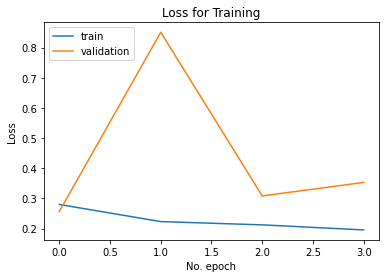

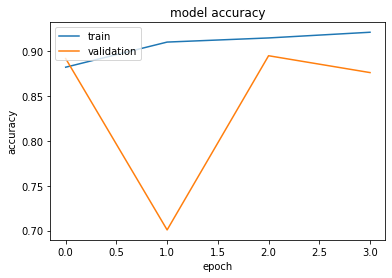

In [ ]:
plt.plot(history_dn6.history['loss'], label='Loss (training data)')
plt.plot(history_dn6.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_dn6.history['accuracy'])
plt.plot(history_dn6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_dn6.load_weights('./covid_classifier_model_dn6.h5')
record_dn6 = saved_model_dn6.evaluate(test_gen)

7/7 [==============================] - 24s 3s/step - loss: 0.4562 - accuracy: 0.7875 - precision: 0.8363 - recall: 0.7150 - auc: 0.8809 - true_positives: 143.0000 - true_negatives: 172.0000 - false_positives: 28.0000 - false_negatives: 57.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_dn6[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(143.0, 172.0, 28.0, 57.0)

In [ ]:
predict_dn6 = saved_model_dn6.predict(test_gen)
#predict

In [ ]:


y_pred_dn6 = predict_dn6 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_dn6 = confusion_matrix(test_gen.classes, y_pred_dn6)
print(mat_dn6)

Confusion Matrix
[[146  54]
 [145  55]]


In [ ]:
conf_dn6 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_dn6

[[172.0, 28.0], [57.0, 143.0]]

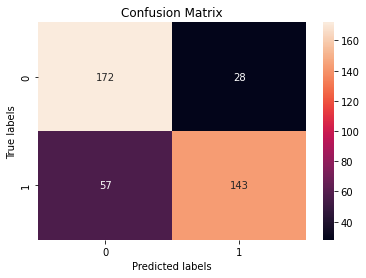

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_dn6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

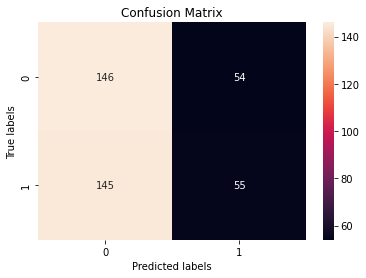

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_dn6, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_dn6.load_weights("covid_classifier_model_dn6.h5")
model_dn6.evaluate(test_gen)

7/7 [==============================] - 19s 3s/step - loss: 0.4562 - accuracy: 0.7875 - precision: 0.8363 - recall: 0.7150 - auc: 0.8809 - true_positives: 143.0000 - true_negatives: 172.0000 - false_positives: 28.0000 - false_negatives: 57.0000


[0.45623311400413513,
 0.7875000238418579,
 0.8362573385238647,
 0.7149999737739563,
 0.8809125423431396,
 143.0,
 172.0,
 28.0,
 57.0]

###MobileNetV2

In [ ]:


base_model_mn = MobileNetV2(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model_mn.layers:
    layer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


####Model 1


In [ ]:

model_mn = tf.keras.Sequential([
    base_model_mn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_mn.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_mn.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_mn = model_mn.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 3043s 17s/step - loss: 0.2895 - accuracy: 0.8832 - precision: 0.8947 - recall: 0.8681 - auc: 0.9485 - true_positives: 4989.0000 - true_negatives: 5185.0000 - false_positives: 587.0000 - false_negatives: 758.0000 - val_loss: 0.3105 - val_accuracy: 0.8781 - val_precision: 0.8379 - val_recall: 0.9433 - val_auc: 0.9597 - val_true_positives: 615.0000 - val_true_negatives: 509.0000 - val_false_positives: 119.0000 - val_false_negatives: 37.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 296s 2s/step - loss: 0.2371 - accuracy: 0.9053 - precision: 0.9162 - recall: 0.8918 - auc: 0.9645 - true_positives: 5125.0000 - true_negatives: 5303.0000 - false_positives: 469.0000 - false_negatives: 622.0000 - val_loss: 0.3345 - val_accuracy: 0.8664 - val_precision: 0.8103 - val_recall: 0.9632 - val_auc: 0.9682 - val_true_positives: 628.0000 - val_true_negatives: 481.0000 - val_false_positives: 147.0000 - val_false_negatives: 24.00

In [ ]:
# load the saved model
saved_model_mn = tf.keras.models.load_model('covid_classifier_model_mn.h5')
saved_model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_mn.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_mn.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9171802997589111 , Validation Accuracy:  0.910937488079071


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_mn.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.21203796565532684 
 Accuracy: 0.9171802997589111 
 Precision: 0.9639883637428284 
 Recall: 0.8663650751113892 
 AUC: 0.9765756130218506 
 True Positive: 4979.0 
 True Negative: 5586.0 
 False Positive: 186.0 
 False Negative: 768.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_mn.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.232516810297966 
 Accuracy: 0.910937488079071 
 Precision: 0.8991097807884216 
 Recall: 0.9294478297233582 
 AUC: 0.9685571789741516 
 True Positive: 606.0 
 True Negative: 560.0 
 False Positive: 68.0 
 False Negative: 46.0


In [ ]:
history_dict = history_mn.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


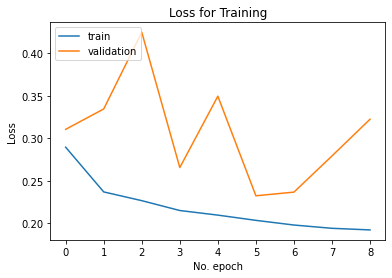

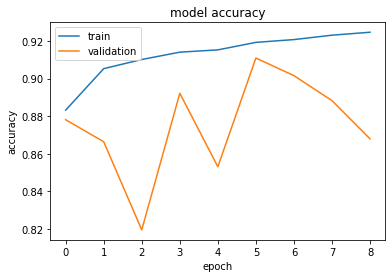

In [ ]:
plt.plot(history_mn.history['loss'], label='Loss (training data)')
plt.plot(history_mn.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_mn.history['accuracy'])
plt.plot(history_mn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_mn.load_weights('./covid_classifier_model_mn.h5')
record_mn = saved_model_mn.evaluate(test_gen)

7/7 [==============================] - 140s 23s/step - loss: 0.6103 - accuracy: 0.7500 - precision: 0.8731 - recall: 0.5850 - auc: 0.8580 - true_positives: 117.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 83.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_mn[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(117.0, 183.0, 17.0, 83.0)

In [ ]:
predict_mn = saved_model_mn.predict(test_gen)
#predict

In [ ]:


y_pred_mn = predict_mn > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_mn = confusion_matrix(test_gen.classes, y_pred_mn)
print(mat_mn)

Confusion Matrix
[[153  47]
 [160  40]]


In [ ]:
conf_mn = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_mn

[[183.0, 17.0], [83.0, 117.0]]

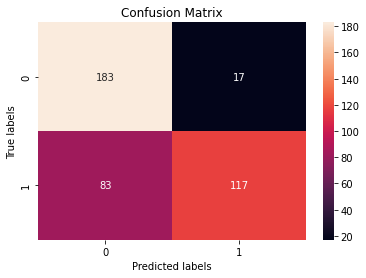

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_mn, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

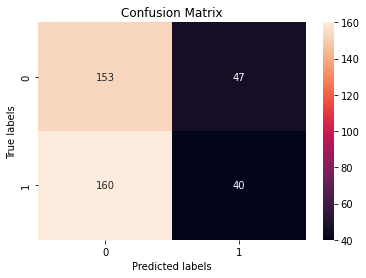

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_mn, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_mn.load_weights("covid_classifier_model_mn.h5")
model_mn.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.6103 - accuracy: 0.7500 - precision: 0.8731 - recall: 0.5850 - auc: 0.8580 - true_positives: 117.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 83.0000


[0.6103338003158569,
 0.75,
 0.8731343150138855,
 0.5849999785423279,
 0.857987642288208,
 117.0,
 183.0,
 17.0,
 83.0]

####Model 2


In [ ]:

model_mn2 = tf.keras.Sequential([
    base_model_mn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_mn2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_mn2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_mn2 = model_mn2.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 333s 2s/step - loss: 0.2851 - accuracy: 0.8812 - precision: 0.8929 - recall: 0.8657 - auc: 0.9502 - true_positives: 4975.0000 - true_negatives: 5175.0000 - false_positives: 597.0000 - false_negatives: 772.0000 - val_loss: 0.3034 - val_accuracy: 0.8734 - val_precision: 0.8302 - val_recall: 0.9448 - val_auc: 0.9656 - val_true_positives: 616.0000 - val_true_negatives: 502.0000 - val_false_positives: 126.0000 - val_false_negatives: 36.0000 - lr: 0.0010
Epoch 2/20
180/180 [==============================] - 386s 2s/step - loss: 0.2337 - accuracy: 0.9082 - precision: 0.9186 - recall: 0.8952 - auc: 0.9654 - true_positives: 5145.0000 - true_negatives: 5316.0000 - false_positives: 456.0000 - false_negatives: 602.0000 - val_loss: 0.3451 - val_accuracy: 0.8687 - val_precision: 0.8159 - val_recall: 0.9586 - val_auc: 0.9615 - val_true_positives: 625.0000 - val_true_negatives: 487.0000 - val_false_positives: 141.0000 - val_false_negatives: 27.0000

In [ ]:
# load the saved model
saved_model_mn2 = tf.keras.models.load_model('covid_classifier_model_mn2.h5')
saved_model_mn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_mn2.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_mn2.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9136209487915039 , Validation Accuracy:  0.9078124761581421


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_mn2.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.21990655362606049 
 Accuracy: 0.9119715094566345 
 Precision: 0.9493070244789124 
 Recall: 0.8700191378593445 
 AUC: 0.9712048172950745 
 True Positive: 5000.0 
 True Negative: 5505.0 
 False Positive: 267.0 
 False Negative: 747.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_mn2.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.21762311458587646 
 Accuracy: 0.9078124761581421 
 Precision: 0.8961424231529236 
 Recall: 0.9263803958892822 
 AUC: 0.9728591442108154 
 True Positive: 604.0 
 True Negative: 558.0 
 False Positive: 70.0 
 False Negative: 48.0


In [ ]:
history_dict = history_mn2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


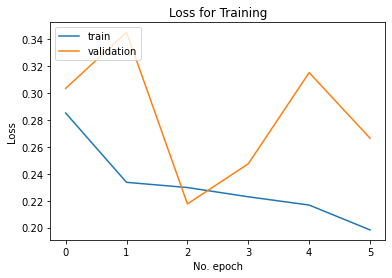

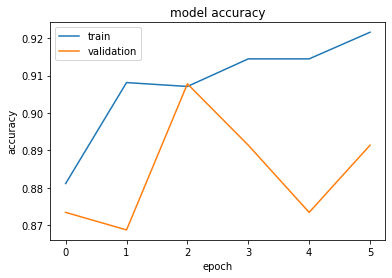

In [ ]:
plt.plot(history_mn2.history['loss'], label='Loss (training data)')
plt.plot(history_mn2.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_mn2.history['accuracy'])
plt.plot(history_mn2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_mn2.load_weights('./covid_classifier_model_mn2.h5')
record_mn2 = saved_model_mn2.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.4991 - accuracy: 0.7725 - precision: 0.8811 - recall: 0.6300 - auc: 0.8870 - true_positives: 126.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 74.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_mn2[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(126.0, 183.0, 17.0, 74.0)

In [ ]:
predict_mn2 = saved_model_mn2.predict(test_gen)
#predict

In [ ]:


y_pred_mn2 = predict_mn2 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_mn2 = confusion_matrix(test_gen.classes, y_pred_mn2)
print(mat_mn2)

Confusion Matrix
[[163  37]
 [153  47]]


In [ ]:
conf_mn2 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_mn2

[[183.0, 17.0], [74.0, 126.0]]

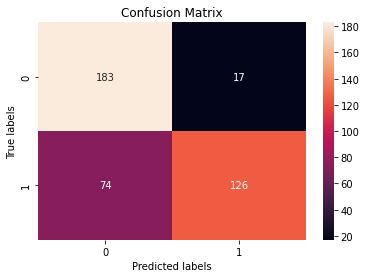

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_mn2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

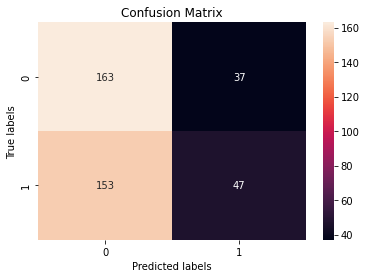

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_mn2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_mn2.load_weights("covid_classifier_model_mn2.h5")
model_mn2.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.4991 - accuracy: 0.7725 - precision: 0.8811 - recall: 0.6300 - auc: 0.8870 - true_positives: 126.0000 - true_negatives: 183.0000 - false_positives: 17.0000 - false_negatives: 74.0000


[0.49907615780830383,
 0.7724999785423279,
 0.881118893623352,
 0.6299999952316284,
 0.8870000243186951,
 126.0,
 183.0,
 17.0,
 74.0]

####Model 3 Best Results


In [ ]:

model_mn3 = tf.keras.Sequential([
    base_model_mn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_mn3.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_mn3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_mn3 = model_mn3.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 336s 2s/step - loss: 0.3690 - accuracy: 0.8372 - precision: 0.8573 - recall: 0.8082 - auc: 0.9175 - true_positives: 4645.0000 - true_negatives: 4999.0000 - false_positives: 773.0000 - false_negatives: 1102.0000 - val_loss: 0.3550 - val_accuracy: 0.8445 - val_precision: 0.7842 - val_recall: 0.9586 - val_auc: 0.9596 - val_true_positives: 625.0000 - val_true_negatives: 456.0000 - val_false_positives: 172.0000 - val_false_negatives: 27.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 291s 2s/step - loss: 0.2716 - accuracy: 0.8886 - precision: 0.9035 - recall: 0.8697 - auc: 0.9542 - true_positives: 4998.0000 - true_negatives: 5238.0000 - false_positives: 534.0000 - false_negatives: 749.0000 - val_loss: 0.2637 - val_accuracy: 0.8883 - val_precision: 0.8641 - val_recall: 0.9264 - val_auc: 0.9629 - val_true_positives: 604.0000 - val_true_negatives: 533.0000 - val_false_positives: 95.0000 - val_false_negatives: 48.

In [ ]:
# load the saved model
saved_model_mn3 = tf.keras.models.load_model('covid_classifier_model_mn3.h5')
saved_model_mn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# evaluate the model
_,train_acc,_,_,_,_,_,_,_ = saved_model_mn3.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_mn3.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9233440160751343 , Validation Accuracy:  0.907031238079071


In [ ]:
# evaluate the model
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_mn3.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.19498379528522491 
 Accuracy: 0.9211736917495728 
 Precision: 0.9422408938407898 
 Recall: 0.8969897627830505 
 AUC: 0.9761913418769836 
 True Positive: 5155.0 
 True Negative: 5456.0 
 False Positive: 316.0 
 False Negative: 592.0


In [ ]:
# evaluate the model
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_mn3.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.22952015697956085 
 Accuracy: 0.907031238079071 
 Precision: 0.889051079750061 
 Recall: 0.9340490698814392 
 AUC: 0.9714657664299011 
 True Positive: 609.0 
 True Negative: 552.0 
 False Positive: 76.0 
 False Negative: 43.0


In [ ]:
history_dict = history_mn3.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


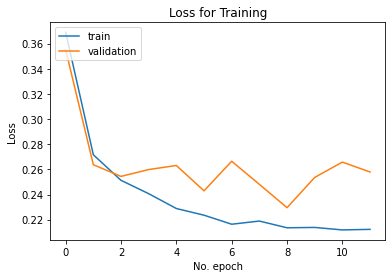

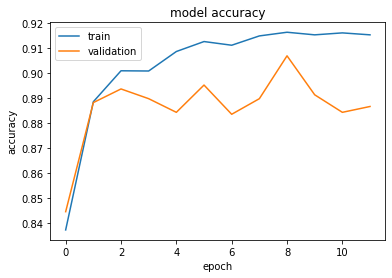

In [ ]:
plt.plot(history_mn3.history['loss'], label='Loss (training data)')
plt.plot(history_mn3.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_mn3.history['accuracy'])
plt.plot(history_mn3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
saved_model_mn3.load_weights('./covid_classifier_model_mn3.h5')
record_mn3 = saved_model_mn3.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.5123 - accuracy: 0.7775 - precision: 0.8675 - recall: 0.6550 - auc: 0.8763 - true_positives: 131.0000 - true_negatives: 180.0000 - false_positives: 20.0000 - false_negatives: 69.0000


In [ ]:


tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_mn3[5:9])
tr_pos, tr_neg, fl_pos, fl_neg



(131.0, 180.0, 20.0, 69.0)

In [ ]:
predict_mn3 = saved_model_mn3.predict(test_gen)
#predict

In [ ]:


y_pred_mn3 = predict_mn3 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_mn3 = confusion_matrix(test_gen.classes, y_pred_mn3)
print(mat_mn3)

Confusion Matrix
[[143  57]
 [159  41]]


In [ ]:
conf_mn3 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_mn3

[[180.0, 20.0], [69.0, 131.0]]

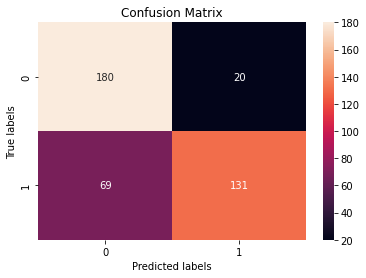

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_mn3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

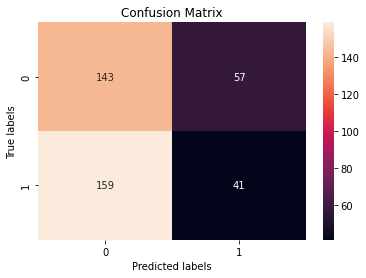

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_mn3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_mn3.load_weights("covid_classifier_model_mn3.h5")
model_mn3.evaluate(test_gen)

7/7 [==============================] - 18s 3s/step - loss: 0.5123 - accuracy: 0.7775 - precision: 0.8675 - recall: 0.6550 - auc: 0.8763 - true_positives: 131.0000 - true_negatives: 180.0000 - false_positives: 20.0000 - false_negatives: 69.0000


[0.5123233199119568,
 0.7774999737739563,
 0.8675496578216553,
 0.6549999713897705,
 0.8762500286102295,
 131.0,
 180.0,
 20.0,
 69.0]

####Model 4


In [ ]:

model_mn4 = tf.keras.Sequential([
    base_model_mn, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_mn4.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model_mn4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

In [ ]:
history_mn4 = model_mn4.fit(train_gen, 
                    validation_data=valid_gen, epochs=20,  
                    callbacks=[callbacks])

Epoch 1/20
180/180 [==============================] - 305s 2s/step - loss: 0.3766 - accuracy: 0.8391 - precision: 0.8495 - recall: 0.8242 - auc: 0.9165 - true_positives: 4746.0000 - true_negatives: 4920.0000 - false_positives: 841.0000 - false_negatives: 1012.0000 - val_loss: 0.2935 - val_accuracy: 0.8789 - val_precision: 0.8651 - val_recall: 0.8988 - val_auc: 0.9486 - val_true_positives: 577.0000 - val_true_negatives: 548.0000 - val_false_positives: 90.0000 - val_false_negatives: 65.0000 - lr: 1.0000e-04
Epoch 2/20
180/180 [==============================] - 288s 2s/step - loss: 0.2906 - accuracy: 0.8812 - precision: 0.8945 - recall: 0.8644 - auc: 0.9487 - true_positives: 4977.0000 - true_negatives: 5174.0000 - false_positives: 587.0000 - false_negatives: 781.0000 - val_loss: 0.2574 - val_accuracy: 0.8875 - val_precision: 0.8854 - val_recall: 0.8910 - val_auc: 0.9595 - val_true_positives: 572.0000 - val_true_negatives: 564.0000 - val_false_positives: 74.0000 - val_false_negatives: 70.0

In [ ]:
# load the saved model
saved_model_mn4 = tf.keras.models.load_model('covid_classifier_model_mn4.h5')
saved_model_mn4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               327936    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# evaluate the accurate
_,train_acc,_,_,_,_,_,_,_ = saved_model_mn4.evaluate(train_gen, verbose=0)
_,test_acc,_,_,_,_,_,_,_ = saved_model_mn4.evaluate(valid_gen, verbose=0)
print('Training Accuracy: ',train_acc,', Validation Accuracy: ' ,  test_acc)

Training Accuracy:  0.9032902121543884 , Validation Accuracy:  0.887499988079071


In [ ]:
# evaluate the model on training set
train_loss,train_acc,train_p,train_r,train_auc,train_tp,train_tn,train_fp,train_fn = saved_model_mn4.evaluate(train_gen, verbose=0)

print('Training Dataset-\n', 'Loss: ',train_loss,'\n', 'Accuracy:',train_acc,'\n', 'Precision:', train_p ,'\n',
      'Recall:',train_r,'\n', 'AUC:', train_auc ,'\n', 'True Positive:', train_tp,'\n',
      'True Negative:', train_tn ,'\n', 'False Positive:', train_fp,'\n', 'False Negative:', train_fn)    

Training Dataset-
 Loss:  0.24288247525691986 
 Accuracy: 0.9007726311683655 
 Precision: 0.9362828731536865 
 Recall: 0.8600208163261414 
 AUC: 0.9656285643577576 
 True Positive: 4952.0 
 True Negative: 5424.0 
 False Positive: 337.0 
 False Negative: 806.0


In [ ]:
# evaluate the model on validation set
val_loss,val_acc,val_p,val_r,val_auc,val_tp,val_tn,val_fp,val_fn = saved_model_mn4.evaluate(valid_gen, verbose=0)

print('Validation Dataset-\n', 'Loss: ',val_loss,'\n', 'Accuracy:',val_acc,'\n', 'Precision:', val_p ,'\n',
      'Recall:',val_r,'\n', 'AUC:', val_auc ,'\n', 'True Positive:', val_tp,'\n',
      'True Negative:', val_tn ,'\n', 'False Positive:', val_fp,'\n', 'False Negative:', val_fn)     
      

Validation Dataset-
 Loss:  0.25738525390625 
 Accuracy: 0.887499988079071 
 Precision: 0.8854489326477051 
 Recall: 0.8909657597541809 
 AUC: 0.9595431089401245 
 True Positive: 572.0 
 True Negative: 564.0 
 False Positive: 74.0 
 False Negative: 70.0


In [ ]:
history_dict = history_mn4.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives', 'lr'])


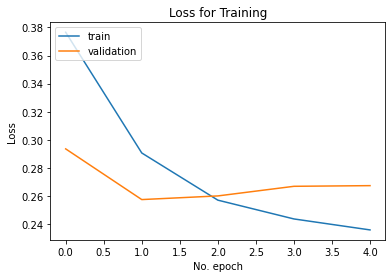

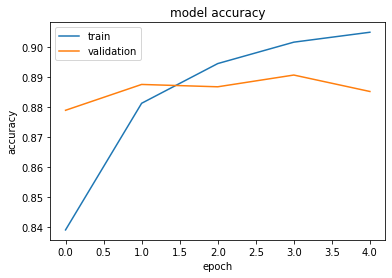

In [ ]:
plt.plot(history_mn4.history['loss'], label='Loss (training data)')
plt.plot(history_mn4.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history_mn4.history['accuracy'])
plt.plot(history_mn4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#predictions on test set
saved_model_mn4.load_weights('./covid_classifier_model_mn4.h5')
record_mn4 = saved_model_mn4.evaluate(test_gen)

7/7 [==============================] - 22s 3s/step - loss: 0.6873 - accuracy: 0.6625 - precision: 0.7826 - recall: 0.4500 - auc: 0.8024 - true_positives: 90.0000 - true_negatives: 175.0000 - false_positives: 25.0000 - false_negatives: 110.0000


In [ ]:
tr_pos, tr_neg, fl_pos, fl_neg = np.array(record_mn4[5:9])
tr_pos, tr_neg, fl_pos, fl_neg

(90.0, 175.0, 25.0, 110.0)

In [ ]:
predict_mn4 = saved_model_mn4.predict(test_gen)
#predict

In [ ]:
y_pred_mn4 = predict_mn4 > 0.8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
mat_mn4 = confusion_matrix(test_gen.classes, y_pred_mn4)
print(mat_mn4)

Confusion Matrix
[[166  34]
 [171  29]]


In [ ]:
conf_mn4 = [[tr_neg, fl_pos],
         [fl_neg, tr_pos]]
conf_mn4

[[175.0, 25.0], [110.0, 90.0]]

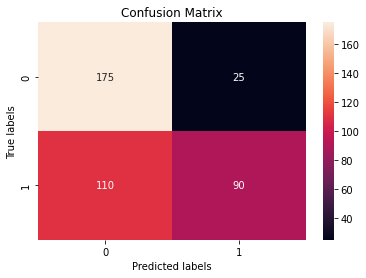

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(conf_mn4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

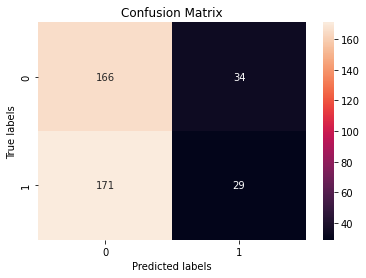

In [ ]:

ax= plt.subplot()
sns.heatmap(mat_mn4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
model_mn4.load_weights("covid_classifier_model_mn4.h5")
model_mn4.evaluate(test_gen)

7/7 [==============================] - 18s 2s/step - loss: 0.6873 - accuracy: 0.6625 - precision: 0.7826 - recall: 0.4500 - auc: 0.8024 - true_positives: 90.0000 - true_negatives: 175.0000 - false_positives: 25.0000 - false_negatives: 110.0000


[0.6872597336769104,
 0.6625000238418579,
 0.782608687877655,
 0.44999998807907104,
 0.8024375438690186,
 90.0,
 175.0,
 25.0,
 110.0]